# Preprocessing and Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("./14.csv")
df

Date  Month_Num   Weekday AI_Platform   AI_Model_Version  \
0     2024-09-21          9  Saturday     ChatGPT        GPT-4-turbo   
1     2024-09-21          9  Saturday     ChatGPT        GPT-4-turbo   
2     2024-09-21          9  Saturday     ChatGPT        GPT-4-turbo   
3     2024-09-21          9  Saturday     ChatGPT        GPT-4-turbo   
4     2024-05-16          5  Thursday    DeepSeek  DeepSeek-Chat 1.5   
...          ...        ...       ...         ...                ...   
9995  2024-05-17          5    Friday    DeepSeek  DeepSeek-Chat 1.5   
9996  2024-05-17          5    Friday    DeepSeek  DeepSeek-Chat 1.5   
9997  2024-05-17          5    Friday    DeepSeek  DeepSeek-Chat 1.5   
9998  2024-05-17          5    Friday    DeepSeek  DeepSeek-Chat 1.5   
9999  2024-05-17          5    Friday    DeepSeek  DeepSeek-Chat 1.5   

      Active_Users  New_Users  Churned_Users  Daily_Churn_Rate  \
0           500000      25000          25000              0.05   
1           500000      25000          25000              0.05   
2           500000      25000          25000              0.05   
3           500000      25000          25000              0.05   
4          1700000     170000          34000              0.02   
...            ...        ...            ...               ...   
9995       1700000     170000          34000              0.02   
9996       1700000     170000          34000              0.02   
9997       1700000     170000          34000              0.02   
9998       1700000     170000          34000              0.02   
9999       1700000     170000          34000              0.02   

      Retention_Rate  ... Session_Duration_sec     Device_Type Language  \
0               0.95  ...                   40          Mobile       es   
1               0.95  ...                   24  Laptop/Desktop       zh   
2               0.95  ...                   34          Mobile       en   
3               0.95  ...                   18          Mobile       fr   
4               0.95  ...                   10          Mobile       de   
...              ...  ...                  ...             ...      ...   
9995            0.95  ...                   34  Laptop/Desktop       zh   
9996            0.95  ...                   19  Laptop/Desktop       en   
9997            0.95  ...                   29  Laptop/Desktop       de   
9998            0.95  ...                   21          Mobile       de   
9999            0.95  ...                   58          Mobile       fr   

      Response_Accuracy  Response_Speed_sec Response_Time_Category  \
0                0.7842                3.30               Standard   
1                0.8194                3.28               Standard   
2                0.8090                3.07               Standard   
3                0.8233                3.06               Standard   
4                0.9366                1.48                   Fast   
...                 ...                 ...                    ...   
9995             0.9791                0.60                Instant   
9996             0.9132                0.83                Instant   
9997             0.9516                0.94                Instant   
9998             0.9359                0.83                Instant   
9999             0.9399                0.76                Instant   

      Correction_Needed  User_Return_Frequency  Customer_Support_Interactions  \
0                     0                      6                              2   
1                     1                      2                              2   
2                     0                      2                              0   
3                     0                      9                              0   
4                     0                      9                              3   
...                 ...                    ...                            ...   
9995                  0                      

In [3]:
df.describe()

Month_Num  Active_Users      New_Users  Churned_Users  \
count  10000.000000  1.000000e+04   10000.000000   10000.000000   
mean       7.128900  1.196255e+06  100508.750000   35395.150000   
std        3.559712  7.444465e+05   85584.077151   14849.189585   
min        1.000000  2.000000e+05   12500.000000    4000.000000   
25%        4.000000  6.500000e+05   35000.000000   25000.000000   
50%        8.000000  9.500000e+05   52500.000000   35000.000000   
75%       10.000000  1.700000e+06  170000.000000   49000.000000   
max       12.000000  3.050000e+06  305000.000000   61000.000000   

       Daily_Churn_Rate  Retention_Rate  Input_Text_Length  Response_Tokens  \
count      10000.000000    1.000000e+04       10000.000000     10000.000000   
mean           0.035228    9.500000e-01           6.260700       274.765100   
std            0.014999    1.110279e-16           1.188561       130.077225   
min            0.020000    9.500000e-01           4.000000        50.000000   
25%            0.020000    9.500000e-01           6.000000       162.000000   
50%            0.050000    9.500000e-01           7.000000       276.000000   
75%            0.050000    9.500000e-01           7.000000       386.250000   
max            0.050000    9.500000e-01           8.000000       500.000000   

        User_Rating  User_Experience_Score  Session_Duration_sec  \
count  10000.000000           10000.000000          10000.000000   
mean       4.394700               1.626706             28.533700   
std        0.734551               0.491296             14.090348   
min        3.000000               0.480000              5.000000   
25%        4.000000               1.230000             17.000000   
50%        5.000000               1.710000             27.000000   
75%        5.000000               2.070000             38.000000   
max        5.000000               2.280000             60.000000   

       Response_Accuracy  Response_Speed_sec  Correction_Needed  \
count        9621.000000        10000.000000       10000.000000   
mean            0.850287            2.356651           0.144600   
std             0.072755            1.303743           0.351715   
min             0.654200            0.330000           0.000000   
25%             0.801800            1.250000           0.000000   
50%             0.862200            2.070000           0.000000   
75%             0.905000            3.450000           0.000000   
max             0.997200            5.190000           1.000000   

       User_Return_Frequency  Customer_Support_Interactions  
count           10000.000000                   10000.000000  
mean                5.530600                       1.476800  
std                 2.867906                       1.120887  
min                 1.000000                       0.000000  
25%                 3.000000                       0.000000  
50%                 6.000000                       1.000000  
75%                 8.000000                       2.000000  
max                10.000000                       3.000000

In [4]:
df.columns

Index(['Date', 'Month_Num', 'Weekday', 'AI_Platform', 'AI_Model_Version',
       'Active_Users', 'New_Users', 'Churned_Users', 'Daily_Churn_Rate',
       'Retention_Rate', 'User_ID', 'Query_Type', 'Input_Text',
       'Input_Text_Length', 'Response_Tokens', 'Topic_Category', 'User_Rating',
       'User_Experience_Score', 'Session_Duration_sec', 'Device_Type',
       'Language', 'Response_Accuracy', 'Response_Speed_sec',
       'Response_Time_Category', 'Correction_Needed', 'User_Return_Frequency',
       'Customer_Support_Interactions', 'Region'],
      dtype='object')

In [5]:
# Columns with missing values
missing = []
for col in df.columns:
    if(df[col].hasnans):
        missing += [col]
missing
# Only one column with missing value

['Response_Accuracy']

In [6]:
df['AI_Platform'].unique()

array(['ChatGPT', 'DeepSeek'], dtype=object)

In [7]:
df['AI_Model_Version'].unique()

array(['GPT-4-turbo', 'DeepSeek-Chat 1.5'], dtype=object)

<Axes: xlabel='Response_Accuracy', ylabel='Count'>

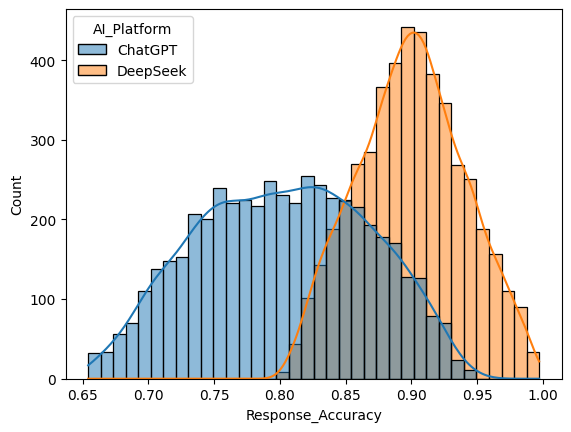

In [8]:
sns.histplot(data = df, x = missing[0], hue = 'AI_Platform', kde = True)

In [9]:
Q1 = df[missing[0]].describe()['25%']
Q3 = df[missing[0]].describe()['75%']
IQR = Q3 - Q1
df[missing[0]][(df[missing[0]] > Q3 + 1.5 * IQR) &(df[missing[0]] < Q1 - 1.5 * IQR)]
# No outliers

Series([], Name: Response_Accuracy, dtype: float64)

In [10]:
i1 = df[df['AI_Platform']=='ChatGPT'].index
i2 = df[df['AI_Platform']=='DeepSeek'].index

In [11]:
df.loc[i1, missing[0]] = df.loc[i1, missing[0]].fillna(method = 'ffill')
df.loc[i1, missing[0]].isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_3752\1889065247.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[i1, missing[0]] = df.loc[i1, missing[0]].fillna(method = 'ffill')


np.int64(0)

In [12]:
df.loc[i2, missing[0]] = df.loc[i2, missing[0]].fillna(method = 'ffill')
df.loc[i2, missing[0]].isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_3752\3828160459.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[i2, missing[0]] = df.loc[i2, missing[0]].fillna(method = 'ffill')


np.int64(0)

In [13]:
df.loc[:, missing[0]].isnull().sum()

np.int64(0)

In [14]:
df[missing[0]].hasnans

False

<Axes: xlabel='Response_Accuracy', ylabel='Count'>

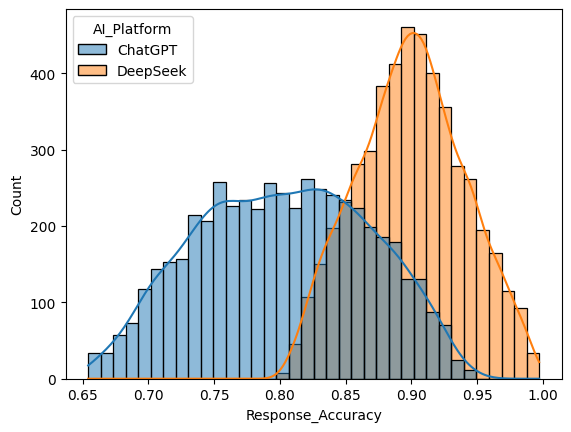

In [15]:
sns.histplot(data = df, x = missing[0], hue = 'AI_Platform', kde = True)

In [16]:
df.describe()

Month_Num  Active_Users      New_Users  Churned_Users  \
count  10000.000000  1.000000e+04   10000.000000   10000.000000   
mean       7.128900  1.196255e+06  100508.750000   35395.150000   
std        3.559712  7.444465e+05   85584.077151   14849.189585   
min        1.000000  2.000000e+05   12500.000000    4000.000000   
25%        4.000000  6.500000e+05   35000.000000   25000.000000   
50%        8.000000  9.500000e+05   52500.000000   35000.000000   
75%       10.000000  1.700000e+06  170000.000000   49000.000000   
max       12.000000  3.050000e+06  305000.000000   61000.000000   

       Daily_Churn_Rate  Retention_Rate  Input_Text_Length  Response_Tokens  \
count      10000.000000    1.000000e+04       10000.000000     10000.000000   
mean           0.035228    9.500000e-01           6.260700       274.765100   
std            0.014999    1.110279e-16           1.188561       130.077225   
min            0.020000    9.500000e-01           4.000000        50.000000   
25%            0.020000    9.500000e-01           6.000000       162.000000   
50%            0.050000    9.500000e-01           7.000000       276.000000   
75%            0.050000    9.500000e-01           7.000000       386.250000   
max            0.050000    9.500000e-01           8.000000       500.000000   

        User_Rating  User_Experience_Score  Session_Duration_sec  \
count  10000.000000           10000.000000          10000.000000   
mean       4.394700               1.626706             28.533700   
std        0.734551               0.491296             14.090348   
min        3.000000               0.480000              5.000000   
25%        4.000000               1.230000             17.000000   
50%        5.000000               1.710000             27.000000   
75%        5.000000               2.070000             38.000000   
max        5.000000               2.280000             60.000000   

       Response_Accuracy  Response_Speed_sec  Correction_Needed  \
count       10000.000000        10000.000000       10000.000000   
mean            0.850327            2.356651           0.144600   
std             0.072722            1.303743           0.351715   
min             0.654200            0.330000           0.000000   
25%             0.801975            1.250000           0.000000   
50%             0.862300            2.070000           0.000000   
75%             0.905000            3.450000           0.000000   
max             0.997200            5.190000           1.000000   

       User_Return_Frequency  Customer_Support_Interactions  
count           10000.000000                   10000.000000  
mean                5.530600                       1.476800  
std                 2.867906                       1.120887  
min                 1.000000                       0.000000  
25%                 3.000000                       0.000000  
50%                 6.000000                       1.000000  
75%                 8.000000                       2.000000  
max                10.000000                       3.000000

In [17]:
df['Date']

0       2024-09-21
1       2024-09-21
2       2024-09-21
3       2024-09-21
4       2024-05-16
           ...    
9995    2024-05-17
9996    2024-05-17
9997    2024-05-17
9998    2024-05-17
9999    2024-05-17
Name: Date, Length: 10000, dtype: object

In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['Date']
# No invalid date is found

0      2024-09-21
1      2024-09-21
2      2024-09-21
3      2024-09-21
4      2024-05-16
          ...    
9995   2024-05-17
9996   2024-05-17
9997   2024-05-17
9998   2024-05-17
9999   2024-05-17
Name: Date, Length: 10000, dtype: datetime64[ns]

In [19]:
df['Date'].sort_values()

2120   2023-07-01
269    2023-07-01
270    2023-07-01
271    2023-07-01
272    2023-07-01
          ...    
8721   2025-02-01
8719   2025-02-01
8720   2025-02-01
5783   2025-02-01
8729   2025-02-01
Name: Date, Length: 10000, dtype: datetime64[ns]

In [20]:
df.describe()

Date     Month_Num  Active_Users      New_Users  \
count                       10000  10000.000000  1.000000e+04   10000.000000   
mean   2024-04-24 18:38:09.600000      7.128900  1.196255e+06  100508.750000   
min           2023-07-01 00:00:00      1.000000  2.000000e+05   12500.000000   
25%           2023-12-06 00:00:00      4.000000  6.500000e+05   35000.000000   
50%           2024-05-02 12:00:00      8.000000  9.500000e+05   52500.000000   
75%           2024-09-07 00:00:00     10.000000  1.700000e+06  170000.000000   
max           2025-02-01 00:00:00     12.000000  3.050000e+06  305000.000000   
std                           NaN      3.559712  7.444465e+05   85584.077151   

       Churned_Users  Daily_Churn_Rate  Retention_Rate  Input_Text_Length  \
count   10000.000000      10000.000000    1.000000e+04       10000.000000   
mean    35395.150000          0.035228    9.500000e-01           6.260700   
min      4000.000000          0.020000    9.500000e-01           4.000000   
25%     25000.000000          0.020000    9.500000e-01           6.000000   
50%     35000.000000          0.050000    9.500000e-01           7.000000   
75%     49000.000000          0.050000    9.500000e-01           7.000000   
max     61000.000000          0.050000    9.500000e-01           8.000000   
std     14849.189585          0.014999    1.110279e-16           1.188561   

       Response_Tokens   User_Rating  User_Experience_Score  \
count     10000.000000  10000.000000           10000.000000   
mean        274.765100      4.394700               1.626706   
min          50.000000      3.000000               0.480000   
25%         162.000000      4.000000               1.230000   
50%         276.000000      5.000000               1.710000   
75%         386.250000      5.000000               2.070000   
max         500.000000      5.000000               2.280000   
std         130.077225      0.734551               0.491296   

       Session_Duration_sec  Response_Accuracy  Response_Speed_sec  \
count          10000.000000       10000.000000        10000.000000   
mean              28.533700           0.850327            2.356651   
min                5.000000           0.654200            0.330000   
25%               17.000000           0.801975            1.250000   
50%               27.000000           0.862300            2.070000   
75%               38.000000           0.905000            3.450000   
max               60.000000           0.997200            5.190000   
std               14.090348           0.072722            1.303743   

       Correction_Needed  User_Return_Frequency  Customer_Support_Interactions  
count       10000.000000           10000.000000                   10000.000000  
mean            0.144600               5.530600                       1.476800  
min             0.000000               1.000000                       0.000000  
25%             0.000000               3.000000                       0.000000  
50%             0.000000               6.000000                       1.000000  
75%             0.000000               8.000000                       2.000000  
max             1.000000              10.000000                       3.000000  
std             0.351715               2.867906                       1.120887

In [21]:
outlier_cols = []
for col in df.describe().columns:
    Q1 = df.describe().loc['25%', col]
    Q3 = df.describe().loc['75%', col]
    IQR = Q3 - Q1
    if(((df[col]>Q3+1.5*IQR) & (df[col]<Q1-1.5*IQR)).sum()>0):
        outlier_cols += [col]
outlier_cols
# No outliers

[]

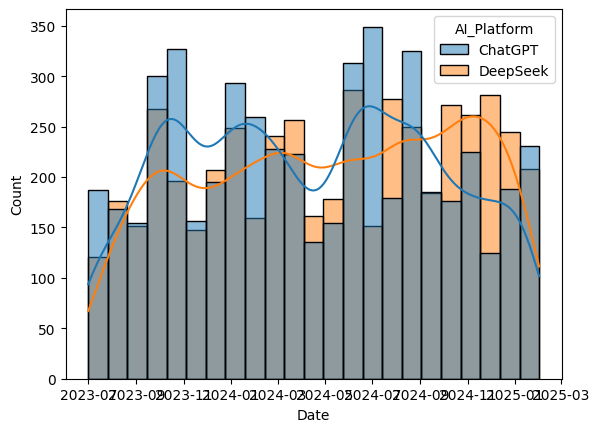

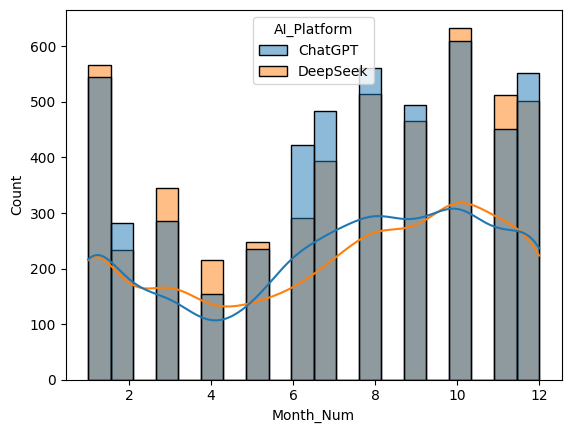

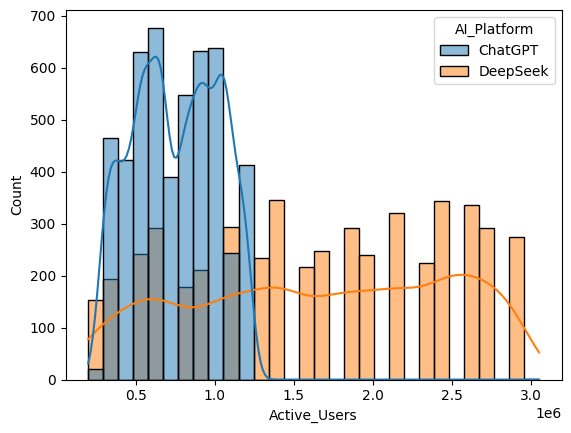

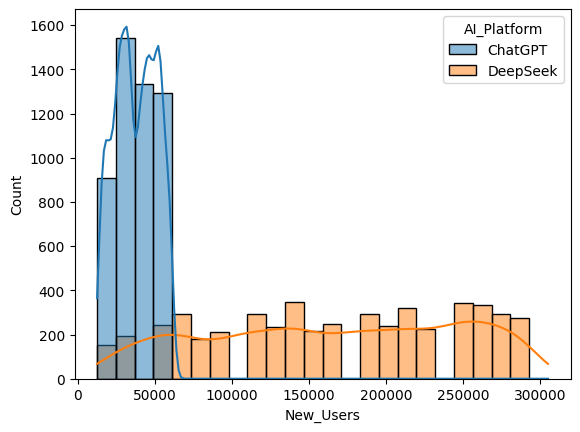

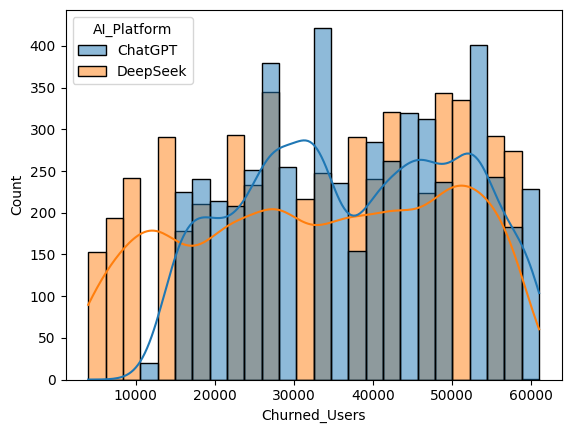

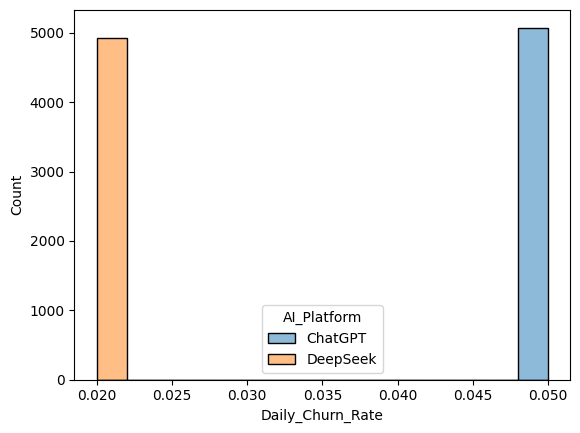

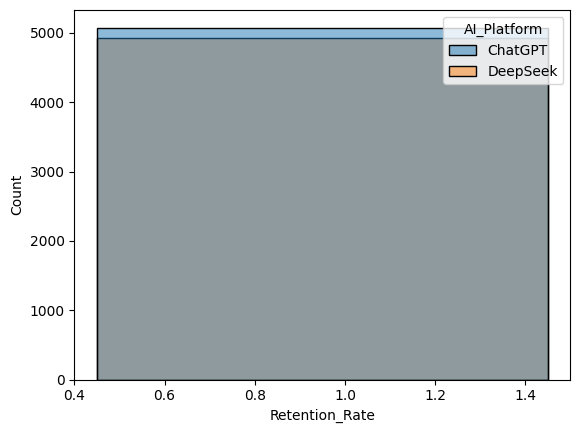

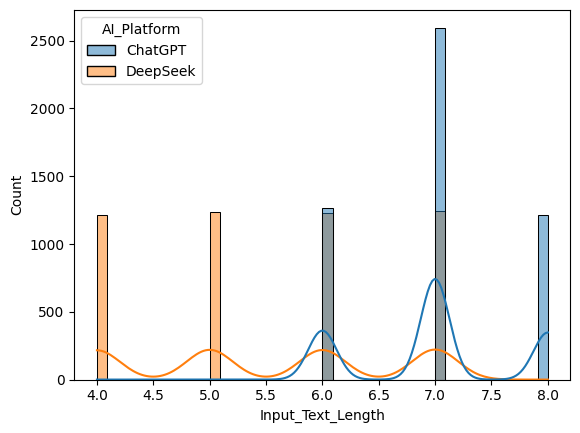

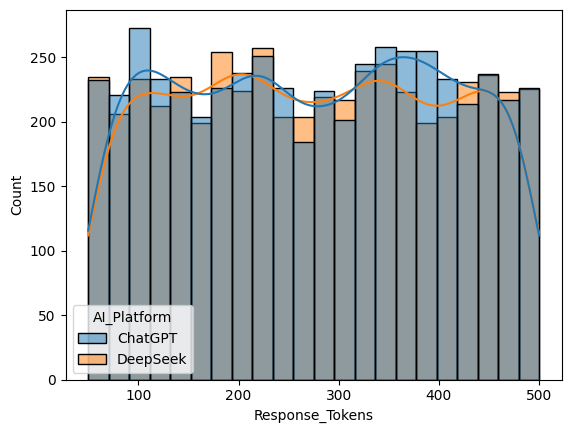

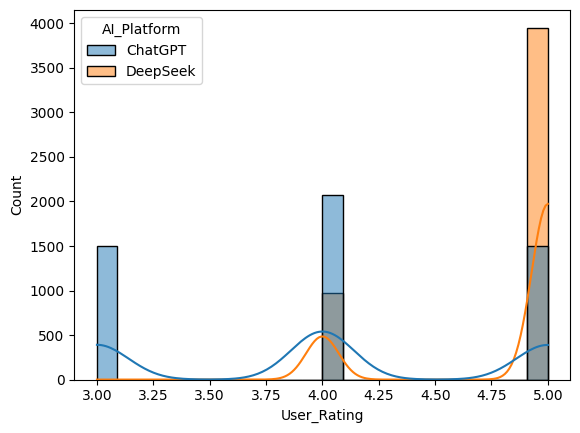

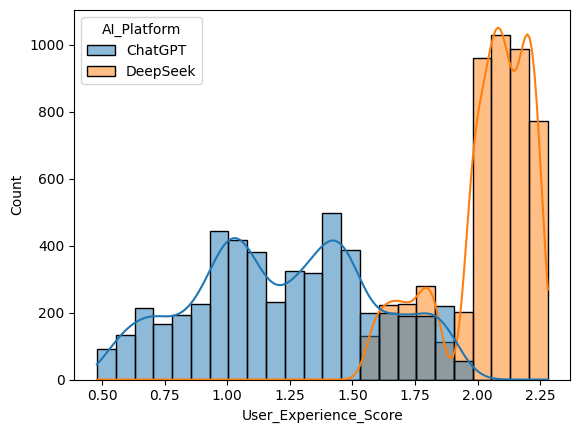

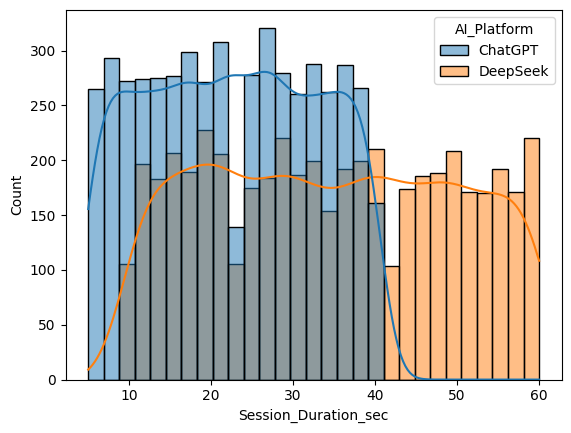

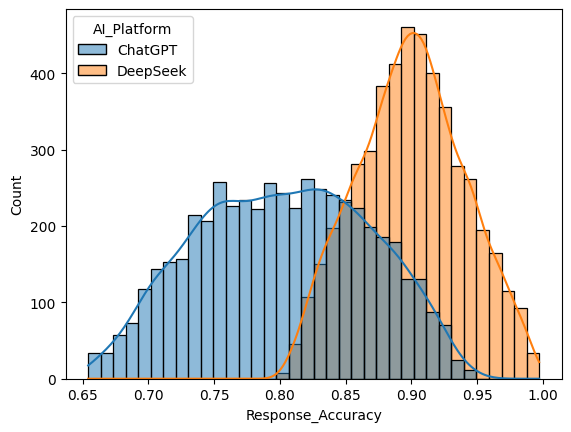

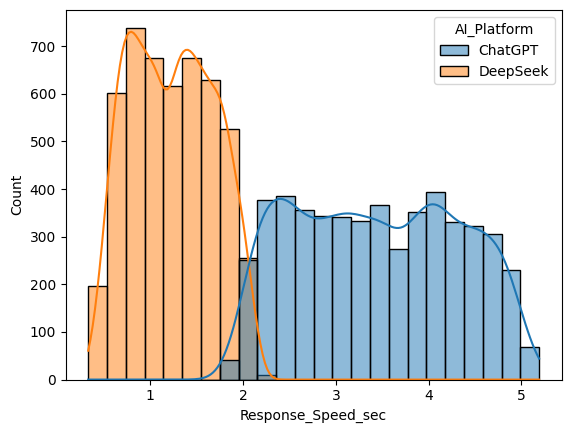

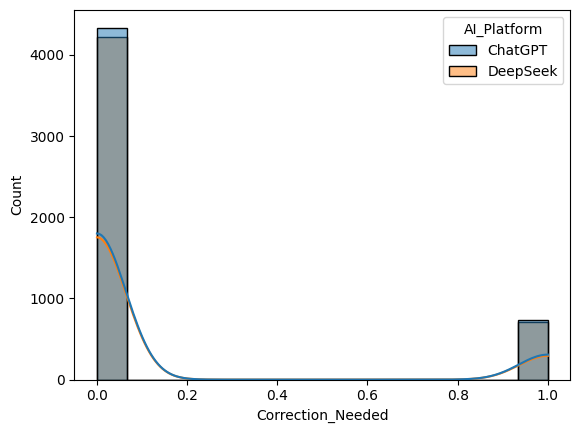

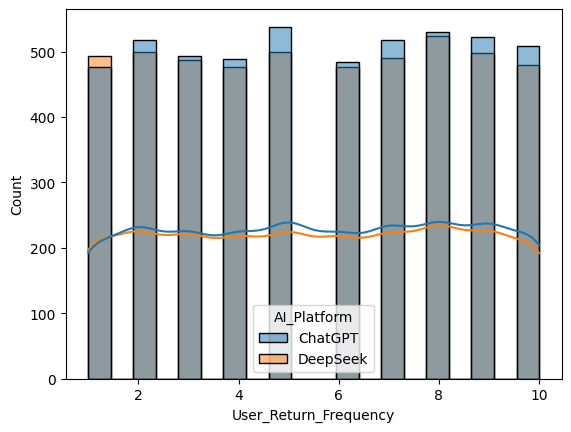

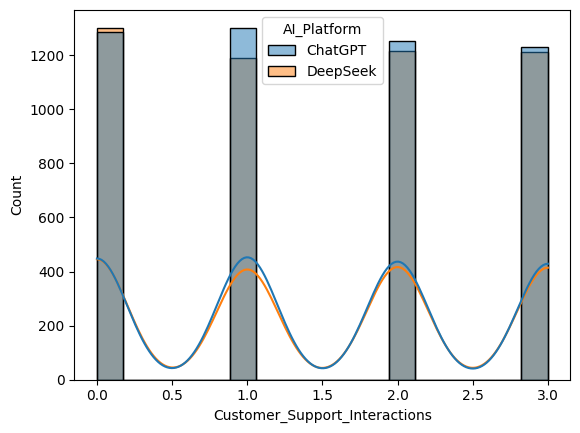

In [22]:
for col in df.describe().columns:
    plt.figure()
    sns.histplot(data = df, x = col, hue = 'AI_Platform', kde = True)
    plt.show()

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           10000 non-null  object 
 1   Month_Num                      10000 non-null  int64  
 2   Weekday                        10000 non-null  object 
 3   AI_Platform                    10000 non-null  object 
 4   AI_Model_Version               10000 non-null  object 
 5   Active_Users                   10000 non-null  int64  
 6   New_Users                      10000 non-null  int64  
 7   Churned_Users                  10000 non-null  int64  
 8   Daily_Churn_Rate               10000 non-null  float64
 9   Retention_Rate                 10000 non-null  float64
 10  User_ID                        10000 non-null  object 
 11  Query_Type                     10000 non-null  object 
 12  Input_Text                  

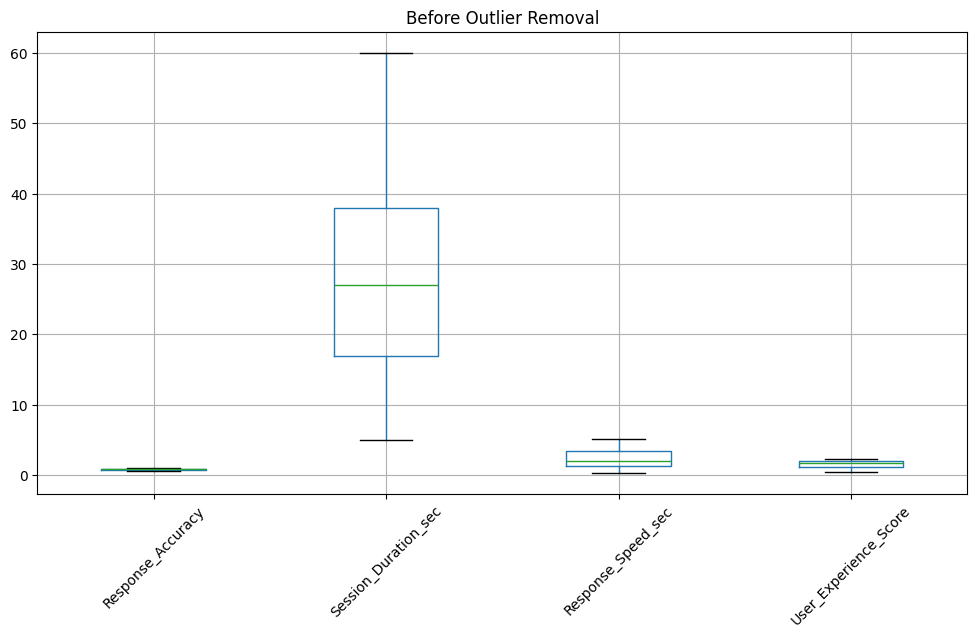

Outliers removed in Response_Accuracy: []
Outliers removed in Session_Duration_sec: []
Outliers removed in Response_Speed_sec: []
Outliers removed in User_Experience_Score: [9, 23, 80, 318, 325, 326, 356, 453, 461, 483, 484, 486, 498, 500, 504, 505, 639, 645, 665, 667, 669, 710, 718, 719, 724, 869, 895, 898, 918, 919, 922, 926, 935, 953, 956, 958, 965, 977, 989, 991, 1044, 1061, 1063, 1118, 1149, 1152, 1154, 1157, 1158, 1212, 1225, 1239, 1240, 1368, 1373, 1375, 1379, 1406, 1428, 1432, 1439, 1440, 1442, 1510, 1511, 1513, 1569, 1604, 1605, 1615, 1650, 1687, 1767, 1820, 1822, 1964, 1997, 2000, 2005, 2093, 2120, 2173, 2266, 2390, 2392, 2393, 2394, 2400, 2401, 2405, 2559, 2560, 2563, 2564, 2572, 2596, 2610, 2612, 2618, 2622, 2625, 2668, 2670, 2676, 2677, 2703, 2704, 2785, 2796, 2799, 2800, 2889, 2896, 2897, 3062, 3137, 3140, 3141, 3142, 3177, 3178, 3182, 3187, 3188, 3303, 3304, 3305, 3309, 3379, 3380, 3542, 3582, 3583, 3634, 3725, 3765, 3774, 3778, 3795, 3797, 3799, 3800, 3801, 3802, 3812, 

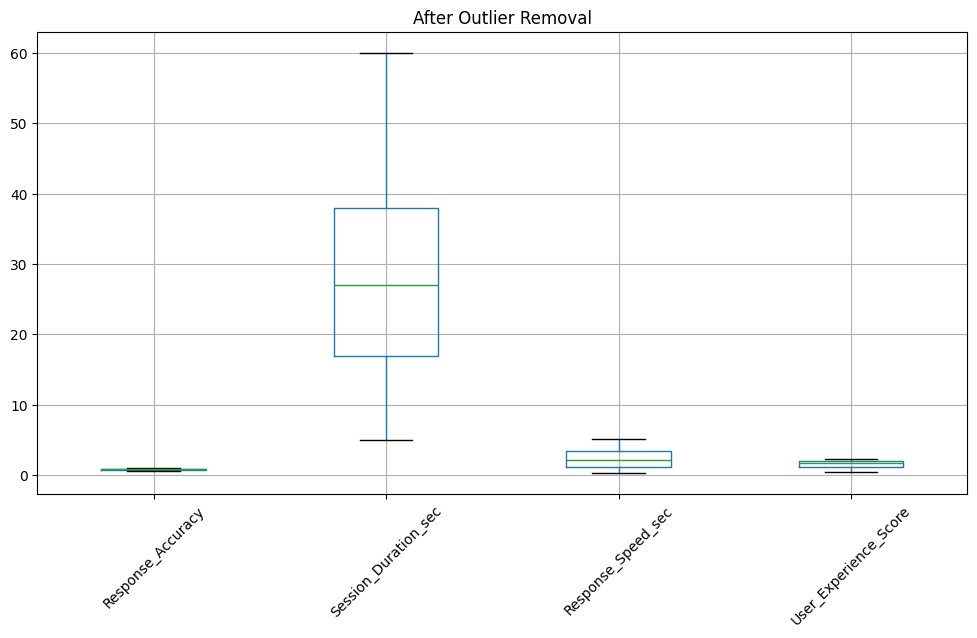

Correlation Matrix:
                               Month_Num  Active_Users  New_Users  \
Month_Num                       1.000000      0.046399   0.035639   
Active_Users                    0.046399      1.000000   0.974449   
New_Users                       0.035639      0.974449   1.000000   
Churned_Users                   0.062362      0.632510   0.442377   
Daily_Churn_Rate                0.003190     -0.611678  -0.752471   
Input_Text_Length               0.004139     -0.372131  -0.462554   
Response_Tokens                -0.018984     -0.014684  -0.011767   
User_Rating                     0.002651      0.354841   0.436435   
User_Experience_Score           0.012924      0.514910   0.630998   
Session_Duration_sec            0.010220      0.262720   0.323524   
Response_Accuracy               0.022003      0.426865   0.513246   
Response_Speed_sec             -0.019689     -0.526139  -0.644055   
Correction_Needed              -0.003743     -0.001210  -0.001249   
User_Return_Fr

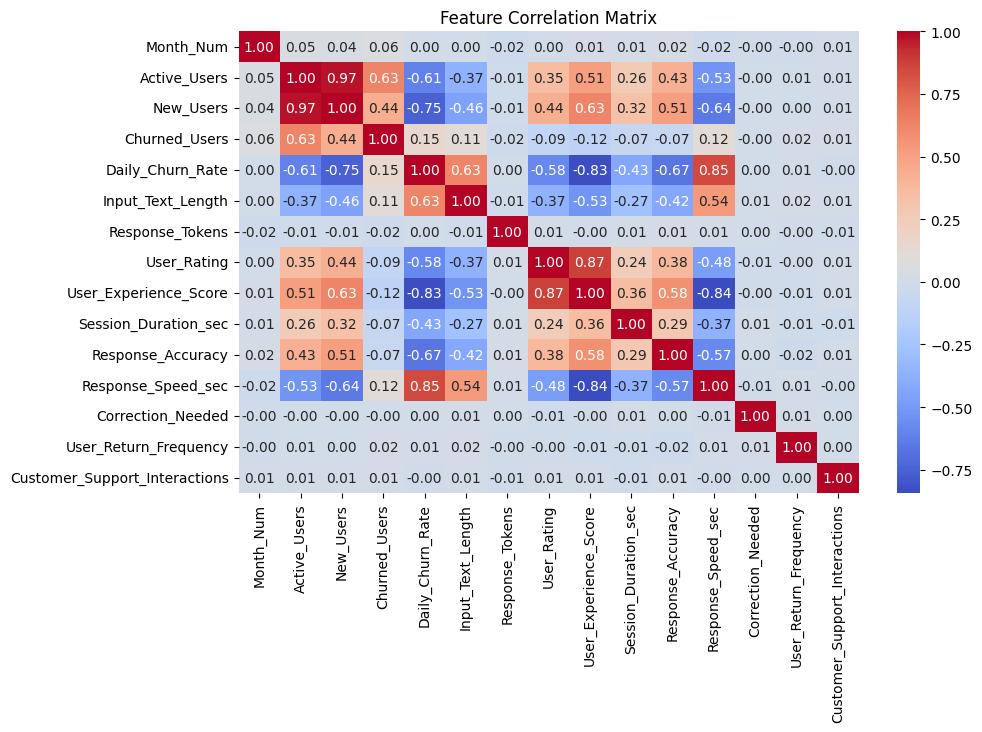

Data preprocessing complete. Cleaned data saved as 'cleaned_data11.csv'.


In [23]:
# Load the dataset
file_path = "14.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Initial Data Info:")
df.info()
print(df.head())

# Handle missing and inconsistent timestamps
def clean_timestamps(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')  # Convert to datetime
    df[column].fillna(method='ffill', inplace=True)           # Forward fill
    return df

timestamp_cols = ["Session_Start_Time", "Session_End_Time"]
for col in timestamp_cols:
    if col in df.columns:
        df = clean_timestamps(df, col)

# Drop columns with all same values
if "Retention_Rate" in df.columns and df["Retention_Rate"].nunique() == 1:
    df.drop(columns=["Retention_Rate"], inplace=True)
    print("Dropped 'Retention_Rate' because all values were the same.")

print("Timestamps cleaned and formatted.")

# Handle missing values based on AI Model Version
def impute_groupwise(df, column, method="mean"):
    if method == "mean":
        df[column] = df.groupby("AI_Model_Version")[column].transform(lambda x: x.fillna(x.mean()))
    elif method == "median":
        df[column] = df.groupby("AI_Model_Version")[column].transform(lambda x: x.fillna(x.median()))
    elif method == "interpolate":
        df[column] = df.groupby("AI_Model_Version")[column].transform(lambda x: x.interpolate(method='linear'))
    return df

# Apply group-wise imputation
numerical_cols = ["Response_Accuracy", "Session_Duration_sec", "Response_Speed_sec", "User_Experience_Score"]
for col in numerical_cols:
    df = impute_groupwise(df, col, method="mean")

print("Missing values filled based on AI Model Version.")

# Boxplot before outlier removal
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("Before Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Remove outliers groupwise using IQR
def remove_outliers_groupwise(df, column):
    outliers = []
    def iqr_filter(group):
        Q1 = group.quantile(0.25)
        Q3 = group.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_idx = group[(group < lower) | (group > upper)].index.tolist()
        outliers.extend(outlier_idx)
        return group[(group >= lower) & (group <= upper)]
    
    df[column] = df.groupby("AI_Model_Version")[column].apply(iqr_filter).reset_index(level=0, drop=True)
    print(f"Outliers removed in {column}: {outliers}")
    return df

for col in numerical_cols:
    df = remove_outliers_groupwise(df, col)

# Drop any remaining NaNs
df.dropna(inplace=True)

# Boxplot after outlier removal
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Normalize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# # One-hot encode categorical features
# categorical_cols = ["AI_Model_Version", "User_Rating", "Device_Type", "Language","Query_Type","Response_Time_Category"]
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# correlation = df.corr(numeric_only=False)
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Matrix")
# plt.show()


# Drop highly correlated features (correlation > threshold)
# def drop_highly_correlated_features(df, threshold=0.85):
#     corr_matrix = df.corr(numeric_only=True).abs()
#     upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#     drop_cols = [column for column in upper.columns if any(upper[column] > threshold)]
#     print("Dropping highly correlated columns:", drop_cols)
#     return df.drop(columns=drop_cols)

# df = drop_highly_correlated_features(df)

# Save the cleaned dataset
df.to_csv("cleaned_data11.csv", index=False)
print("Data preprocessing complete. Cleaned data saved as 'cleaned_data11.csv'.")


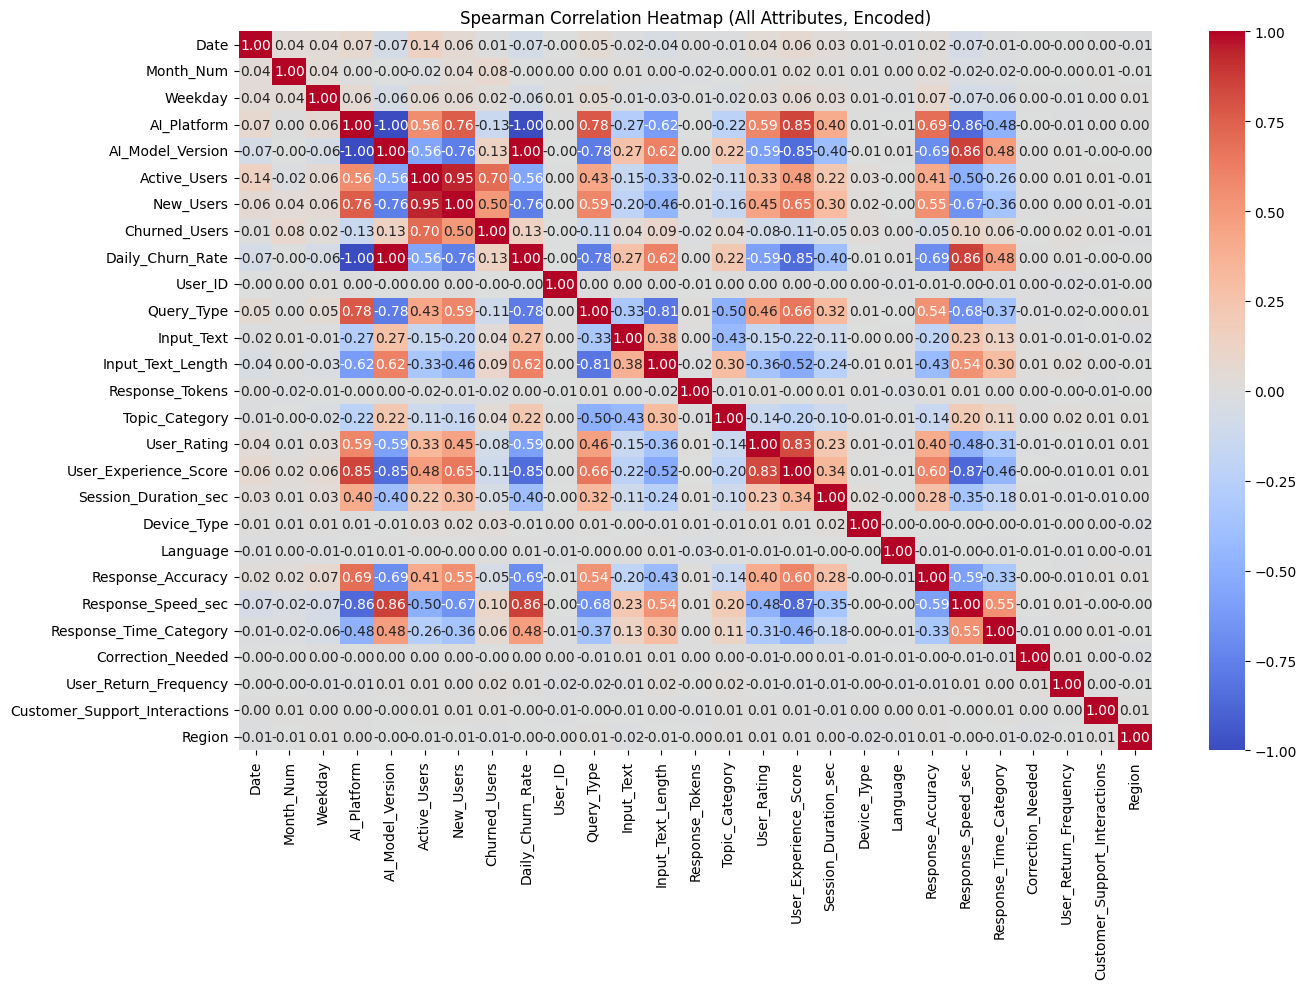

In [24]:
# Make a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Encode non-numeric columns using LabelEncoder
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Store encoder if needed later

# Compute Spearman correlation on all columns (now all numeric)
spearman_corr_all = df_encoded.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman Correlation Heatmap (All Attributes, Encoded)")
plt.tight_layout()
plt.show()


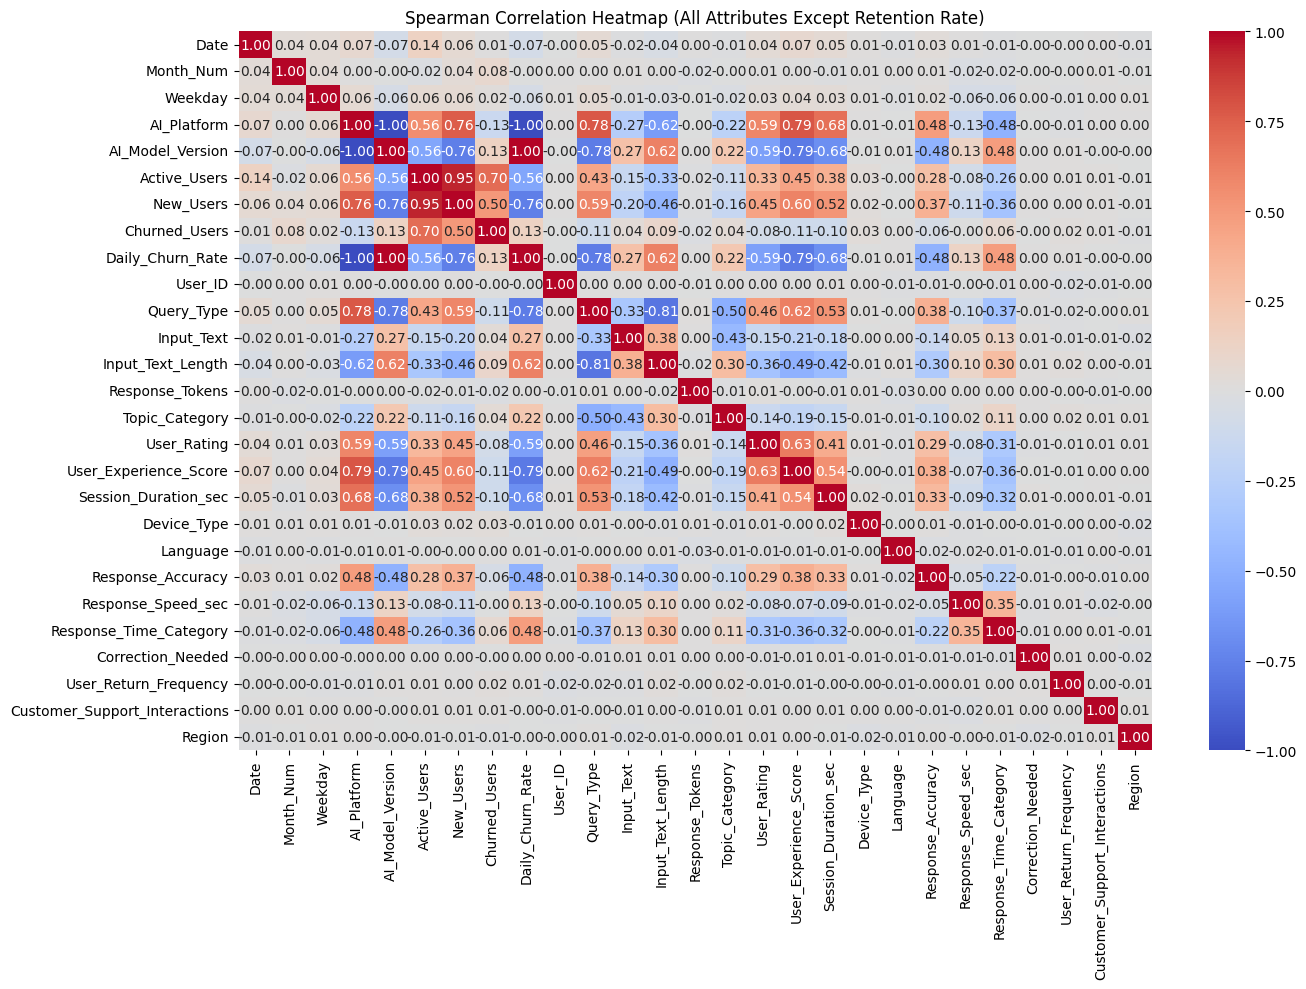

In [25]:
# Copy the DataFrame
#df_encoded = df.copy()
df_encoded = pd.read_csv("cleaned_imputed.csv")
# Encode non-numeric columns
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Drop 'Retention_Rate' if it exists
if 'Retention_Rate' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['Retention_Rate'])

# Compute Spearman correlation
spearman_corr_all = df_encoded.corr(method='spearman')

# Drop 'Retention_Rate' from correlation matrix if still present (as index)
spearman_corr_all = spearman_corr_all.drop(index='Retention_Rate', errors='ignore')
spearman_corr_all = spearman_corr_all.drop(columns='Retention_Rate', errors='ignore')

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman Correlation Heatmap (All Attributes Except Retention Rate)")
plt.tight_layout()
plt.show()


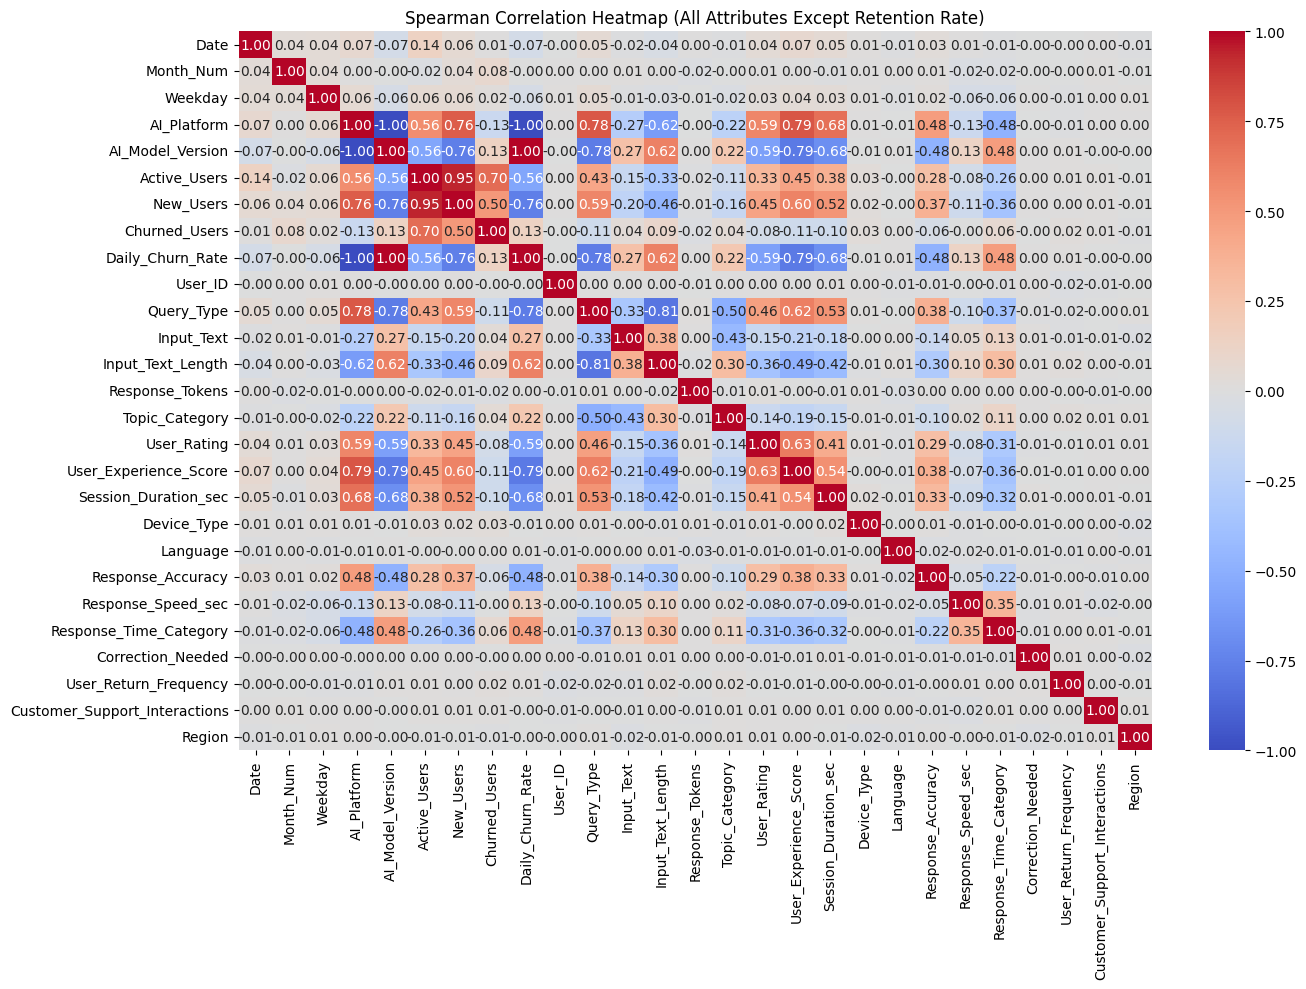

In [26]:
# Copy the DataFrame
#df_encoded = df.copy()
df_encoded = pd.read_csv("cleaned_imputed.csv")
# Encode non-numeric columns
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Drop 'Retention_Rate' if it exists
if 'Retention_Rate' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['Retention_Rate'])

# Compute Spearman correlation
spearman_corr_all = df_encoded.corr(method='spearman')

# Drop 'Retention_Rate' from correlation matrix if still present (as index)
spearman_corr_all = spearman_corr_all.drop(index='Retention_Rate', errors='ignore')
spearman_corr_all = spearman_corr_all.drop(columns='Retention_Rate', errors='ignore')

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman Correlation Heatmap (All Attributes Except Retention Rate)")
plt.tight_layout()
plt.show()


In [27]:
# Load your dataset
df = pd.read_csv("cleaned_data11.csv")

# Columns that shouldn't have negative values
non_negative_cols = ['Session_Duration_sec', 'Response_Speed_sec', 'User_Experience_Score', 'Response_Accuracy']

# Replace negative values with NaN
for col in non_negative_cols:
    df[col] = df[col].map(lambda x: x if x >= 0 else None)

# Impute missing values group-wise, then fill any remaining with overall mean
for col in non_negative_cols:
    df[col] = df.groupby("AI_Model_Version")[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df[col].fillna(df[col].mean())  # ✅ no inplace, no warning

# Confirm no missing values
print("\nRemaining missing values:\n", df[non_negative_cols].isnull().sum())

# Save the cleaned data
df.to_csv("cleaned_imputed.csv", index=False)
print("✅ All done! Cleaned and saved as 'cleaned_imputed.csv'")



Remaining missing values:
 Session_Duration_sec     0
Response_Speed_sec       0
User_Experience_Score    0
Response_Accuracy        0
dtype: int64
✅ All done! Cleaned and saved as 'cleaned_imputed.csv'


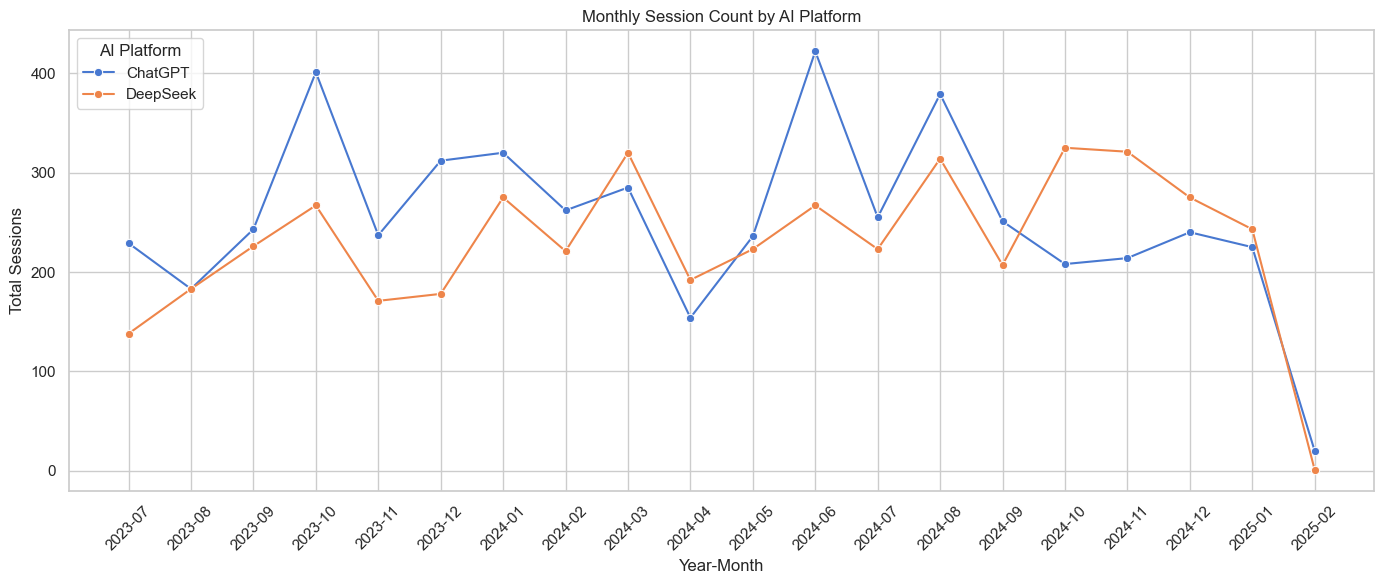

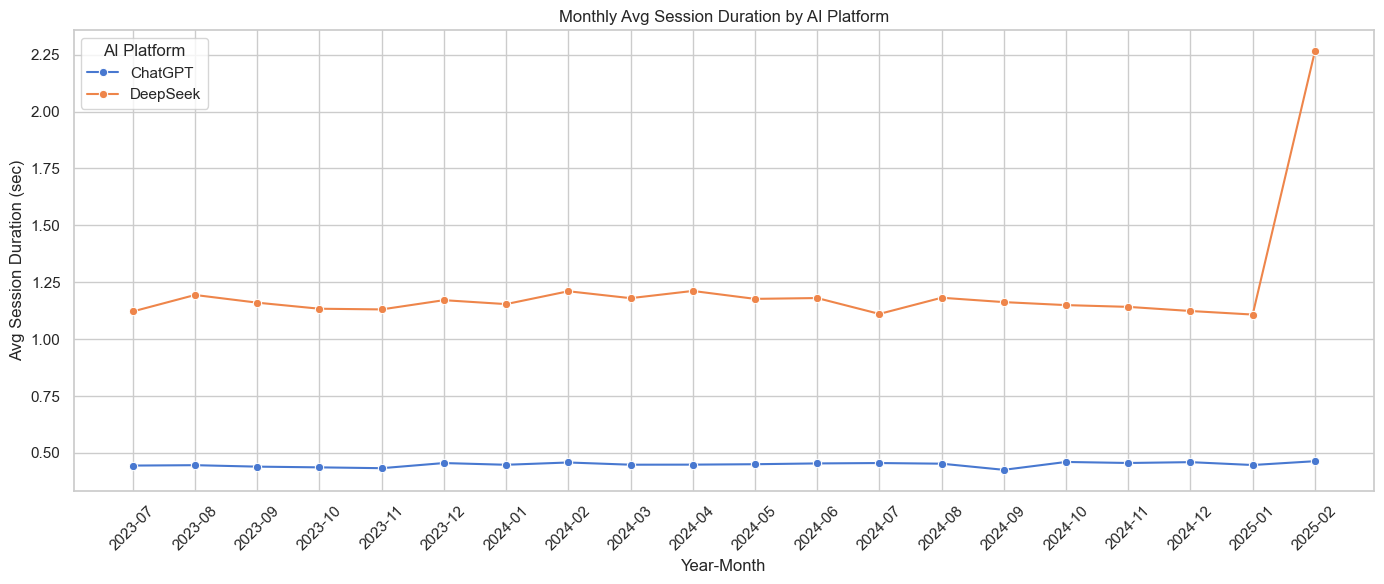

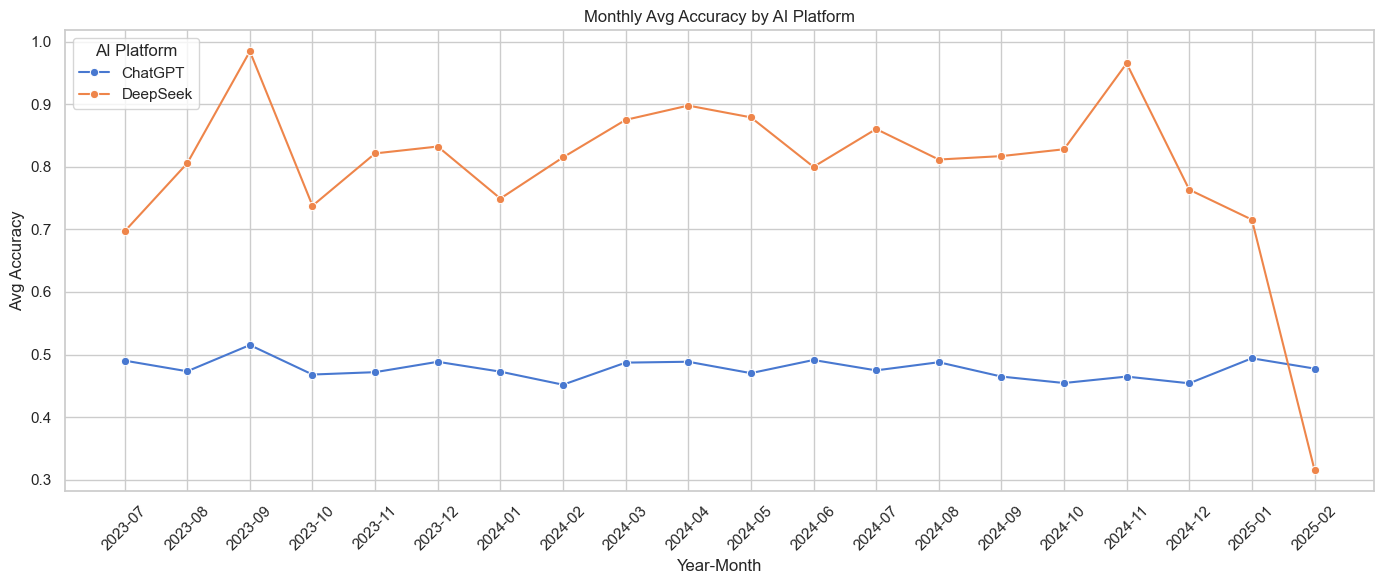

In [28]:
# Ensure 'Date' is datetime and create 'Year_Month'
df['Date'] = pd.to_datetime(df['Date'])
df['Year_Month'] = df['Date'].dt.to_period('M').astype(str)  # Convert to string for cleaner axis

# Group by Year-Month and AI_Platform
trend_by_model = df.groupby(['Year_Month', 'AI_Platform']).agg({
    'Session_Duration_sec': 'mean',
    'Response_Accuracy': 'mean',
    'Date': 'count'
}).rename(columns={'Date': 'Total_Sessions'}).reset_index()

# Sort by time
trend_by_model = trend_by_model.sort_values('Year_Month')

# Set common plot style
sns.set(style="whitegrid", palette="muted")

# Plot 1: Session Count
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_by_model, x='Year_Month', y='Total_Sessions', hue='AI_Platform', marker='o')
plt.title('Monthly Session Count by AI Platform')
plt.xlabel('Year-Month')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.legend(title='AI Platform', loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Avg Session Duration
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_by_model, x='Year_Month', y='Session_Duration_sec', hue='AI_Platform', marker='o')
plt.title('Monthly Avg Session Duration by AI Platform')
plt.xlabel('Year-Month')
plt.ylabel('Avg Session Duration (sec)')
plt.xticks(rotation=45)
plt.legend(title='AI Platform', loc='upper left')
plt.tight_layout()
plt.show()

# Plot 3: Avg Accuracy
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_by_model, x='Year_Month', y='Response_Accuracy', hue='AI_Platform', marker='o')
plt.title('Monthly Avg Accuracy by AI Platform')
plt.xlabel('Year-Month')
plt.ylabel('Avg Accuracy')
plt.xticks(rotation=45)
plt.legend(title='AI Platform', loc='upper left')
plt.tight_layout()
plt.show()


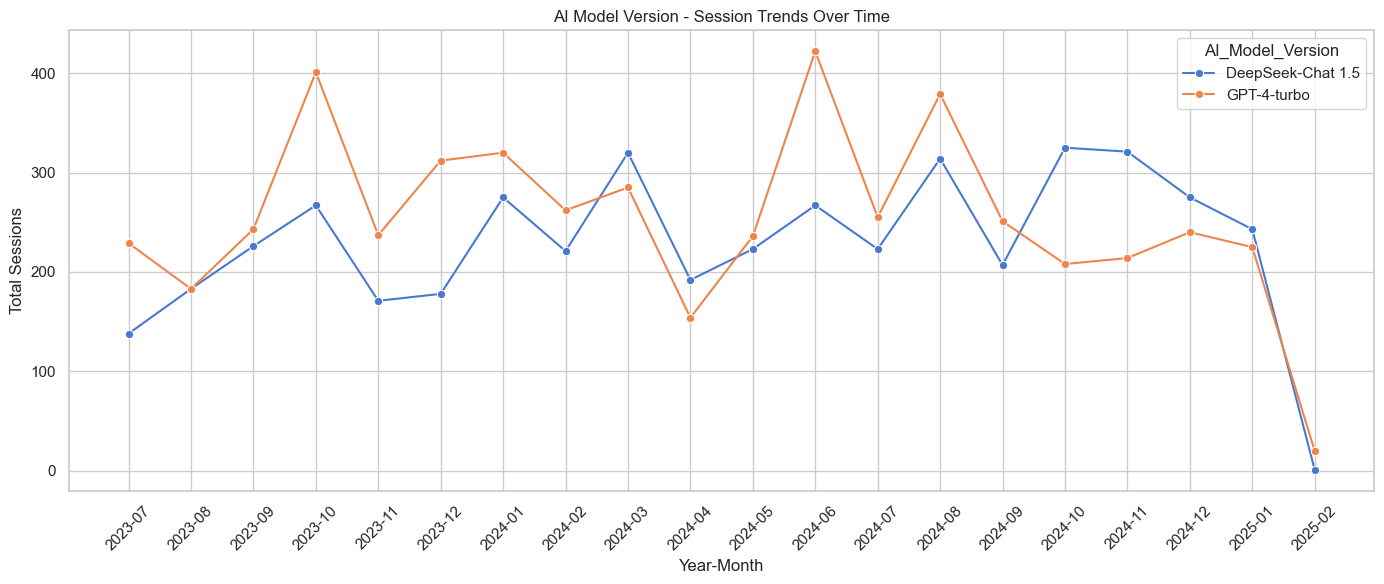

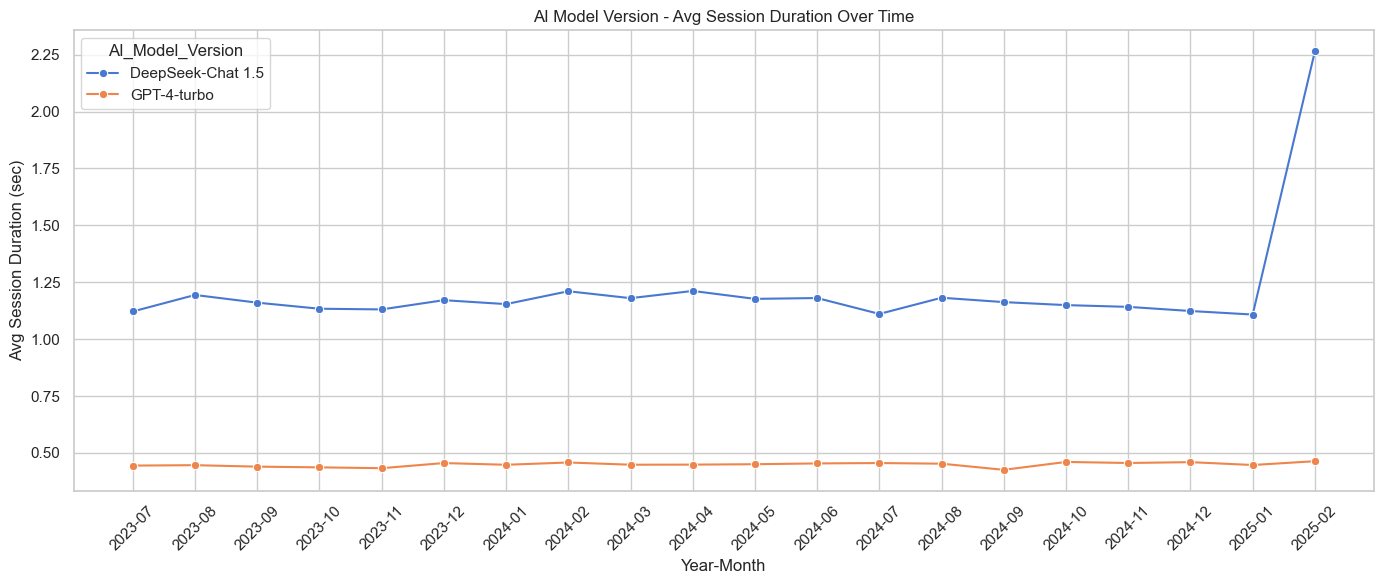

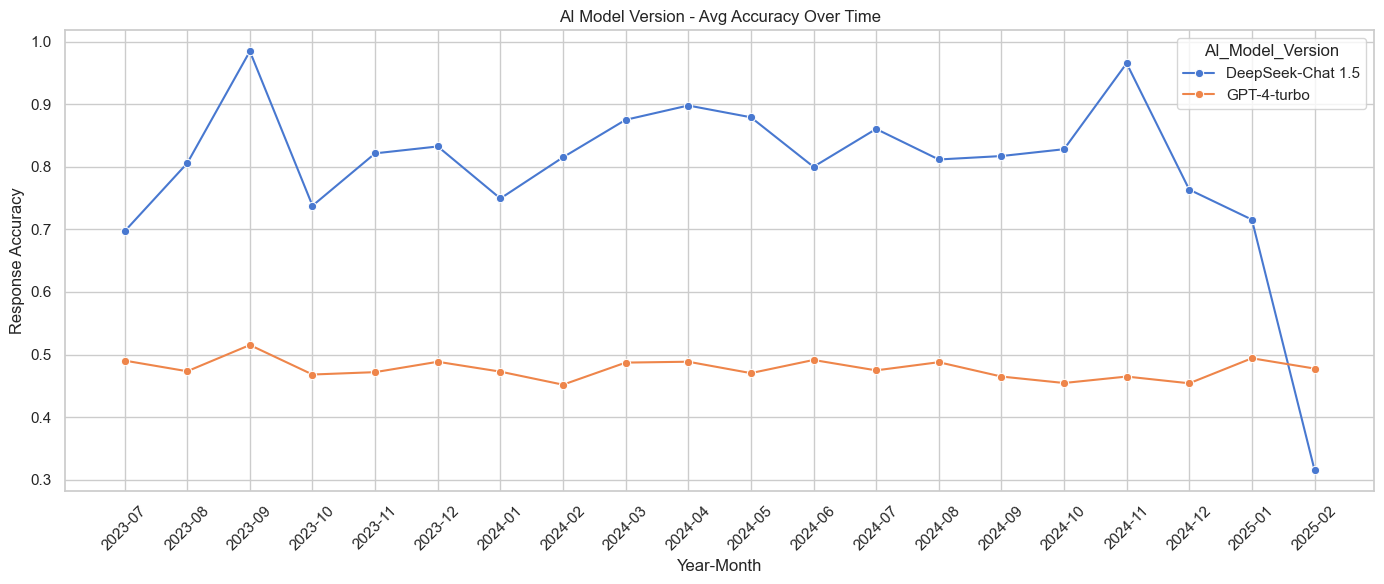

In [29]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a Year-Month column for grouping
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

# Group by YearMonth and AI_Model_Version to calculate metrics
version_trends = df.groupby(['YearMonth', 'AI_Model_Version']).agg({
    'Session_Duration_sec': 'mean',
    'Response_Accuracy': 'mean',
    'User_Experience_Score': 'mean',
    'Date': 'count'  # Total sessions
}).rename(columns={'Date': 'Total_Sessions'}).reset_index()

# Plotting session trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=version_trends, x='YearMonth', y='Total_Sessions', hue='AI_Model_Version', marker='o')
plt.xticks(rotation=45)
plt.title('AI Model Version - Session Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sessions')
plt.tight_layout()
plt.show()

# Plotting average session duration
plt.figure(figsize=(14, 6))
sns.lineplot(data=version_trends, x='YearMonth', y='Session_Duration_sec', hue='AI_Model_Version', marker='o')
plt.xticks(rotation=45)
plt.title('AI Model Version - Avg Session Duration Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Avg Session Duration (sec)')
plt.tight_layout()
plt.show()

# Plotting accuracy
plt.figure(figsize=(14, 6))
sns.lineplot(data=version_trends, x='YearMonth', y='Response_Accuracy', hue='AI_Model_Version', marker='o')
plt.xticks(rotation=45)
plt.title('AI Model Version - Avg Accuracy Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Response Accuracy')
plt.tight_layout()
plt.show()


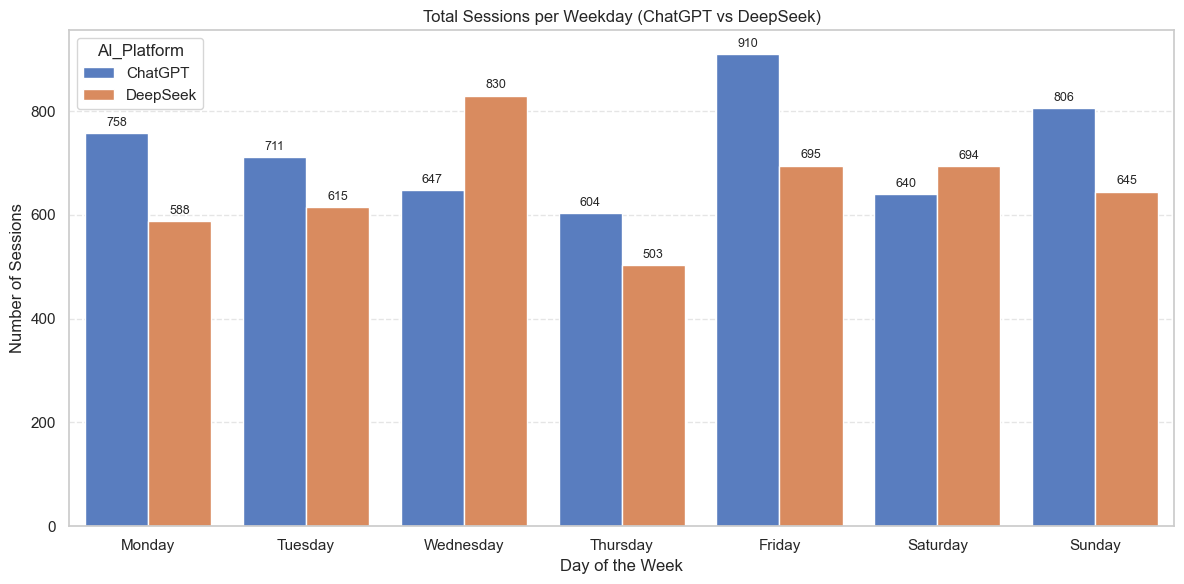

In [30]:
# Add 'Weekday' column
df['Weekday'] = df['Date'].dt.day_name()

# Group by Weekday and AI_Platform, and count sessions
weekday_usage = df.groupby(['Weekday', 'AI_Platform']).size().reset_index(name='Sessions')

# Order the days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_usage['Weekday'] = pd.Categorical(weekday_usage['Weekday'], categories=weekday_order, ordered=True)
weekday_usage = weekday_usage.sort_values('Weekday')

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=weekday_usage, x='Weekday', y='Sessions', hue='AI_Platform')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.title('Total Sessions per Weekday (ChatGPT vs DeepSeek)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sessions')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


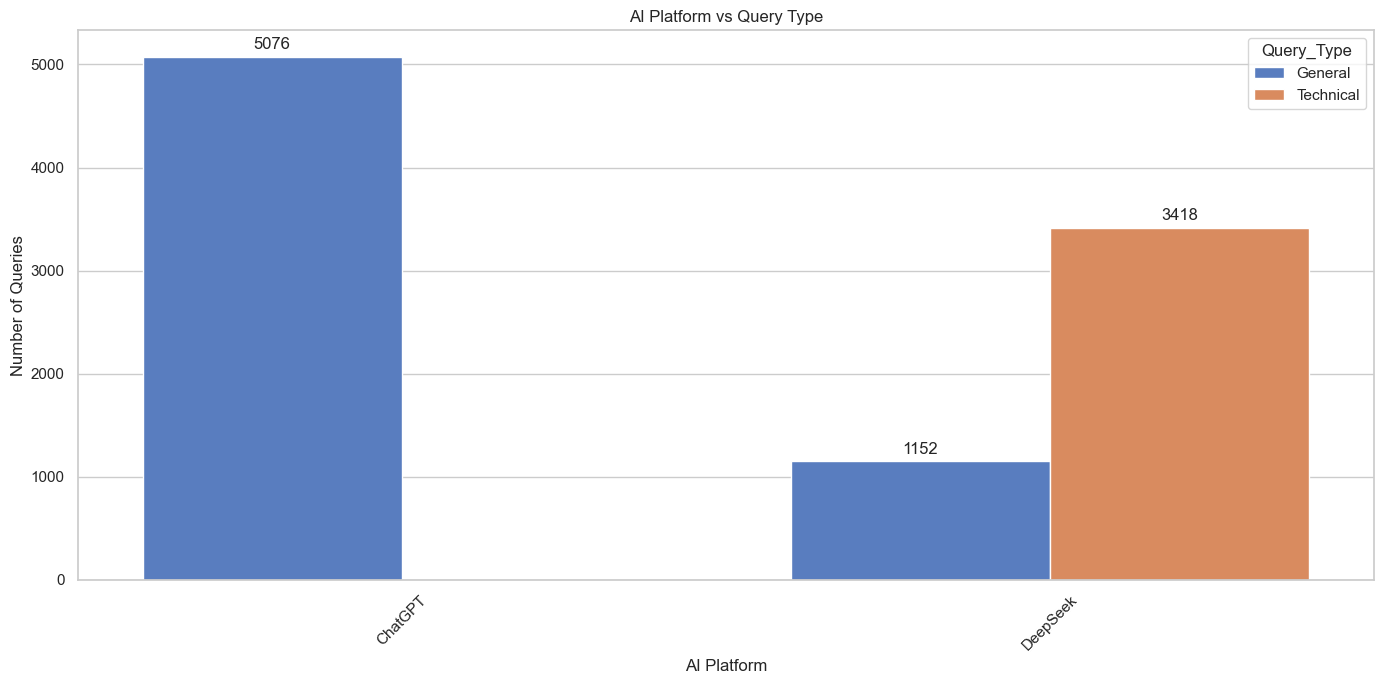

In [31]:
import seaborn as sns

# Group the data
platform_query_counts = df.groupby(['AI_Platform', 'Query_Type']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=platform_query_counts, x='AI_Platform', y='Count', hue='Query_Type')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('AI Platform vs Query Type')
plt.xlabel('AI Platform')
plt.ylabel('Number of Queries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


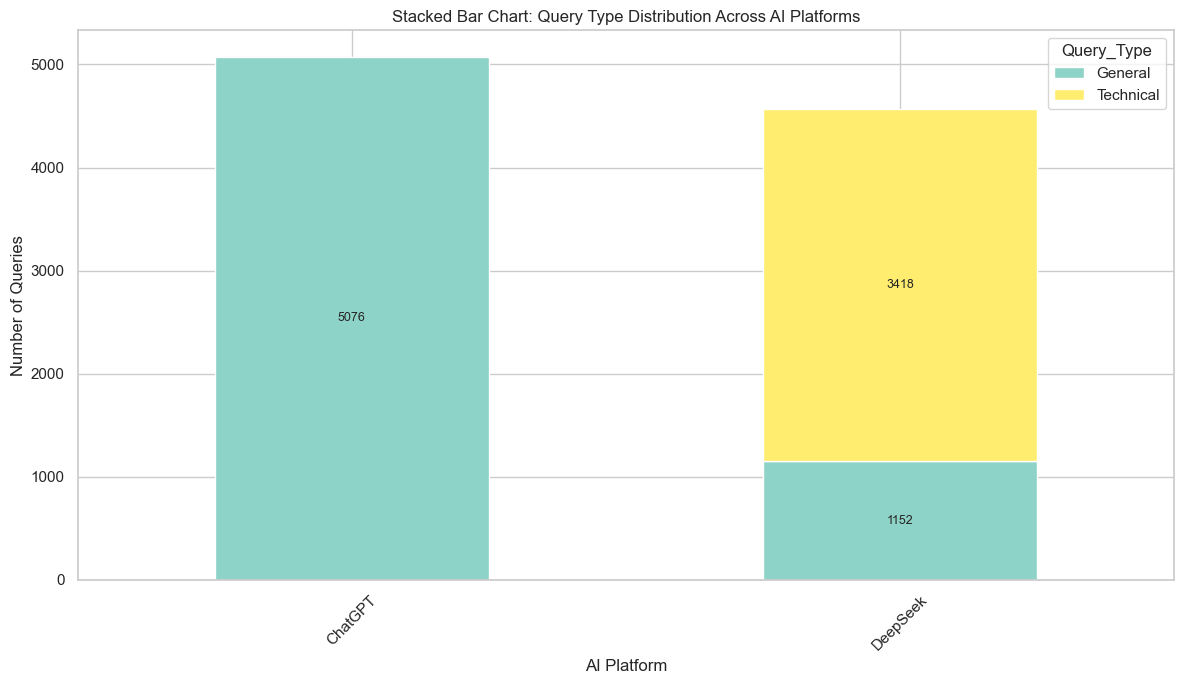

In [32]:
# Group and prepare the data
stacked_data = df.groupby(['AI_Platform', 'Query_Type']).size().unstack(fill_value=0)

# Plot
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('Stacked Bar Chart: Query Type Distribution Across AI Platforms')
plt.xlabel('AI Platform')
plt.ylabel('Number of Queries')
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels
for i, platform in enumerate(stacked_data.index):
    y_offset = 0
    for query_type in stacked_data.columns:
        value = stacked_data.loc[platform, query_type]
        if value > 0:
            ax.text(i, y_offset + value / 2, str(value), ha='center', va='center', fontsize=9)
            y_offset += value

plt.show()



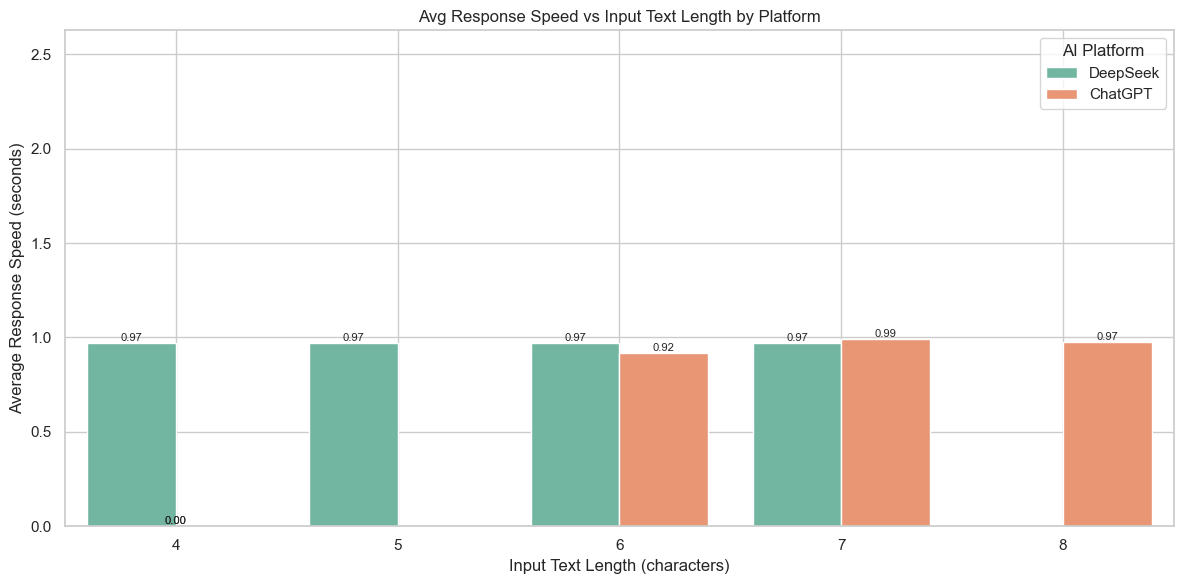

In [33]:
# Clean and convert data
df['Input_Text_Length'] = pd.to_numeric(df['Input_Text_Length'], errors='coerce')
df['Response_Speed_sec'] = pd.to_numeric(df['Response_Speed_sec'], errors='coerce')

# Drop NaNs
df = df.dropna(subset=['Input_Text_Length', 'Response_Speed_sec'])

# Group by Input Length and Platform
avg_speed = df.groupby(['Input_Text_Length', 'AI_Platform'])['Response_Speed_sec'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=avg_speed,
    x='Input_Text_Length',
    y='Response_Speed_sec',
    hue='AI_Platform',
    palette='Set2'
)

# Add labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{height:.2f}', 
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=8
    )

plt.title('Avg Response Speed vs Input Text Length by Platform')
plt.xlabel('Input Text Length (characters)')
plt.ylabel('Average Response Speed (seconds)')
plt.ylim(0, df['Response_Speed_sec'].max() + 0.5)
plt.legend(title='AI Platform')
plt.tight_layout()
plt.grid(True)
plt.show()


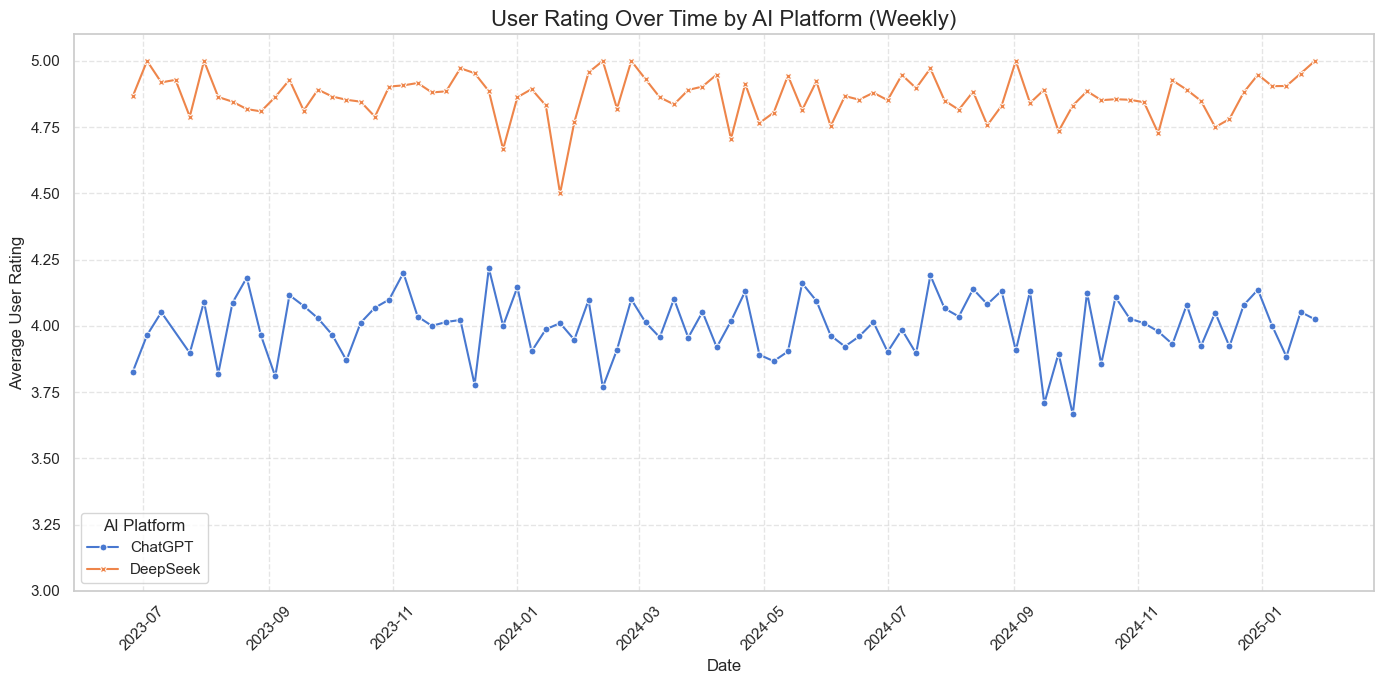

In [34]:
# Use weekly aggregation to reduce clutter while keeping detail
df['Week'] = df['Date'].dt.to_period('W').dt.start_time

# Calculate average rating per platform per week
ratings_over_time = df.groupby(['Week', 'AI_Platform'])['User_Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=ratings_over_time, 
    x='Week', 
    y='User_Rating', 
    hue='AI_Platform', 
    style='AI_Platform',
    markers=True, 
    dashes=False,
    linewidth=1.5, 
    markersize=5
)

plt.title('User Rating Over Time by AI Platform (Weekly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average User Rating', fontsize=12)
plt.ylim(3, 5.1)  # Crop just below 3 to allow breathing room
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='AI Platform')
plt.tight_layout()
plt.show()



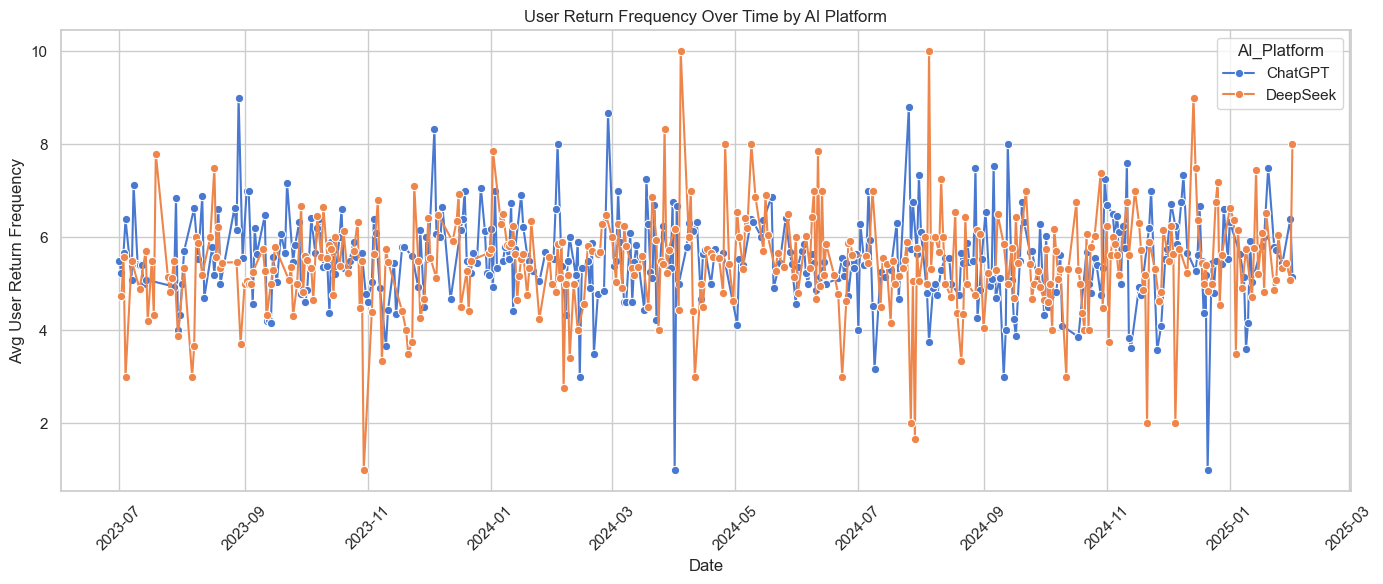

A line for each platform (e.g., ChatGPT, DeepSeek).
X-axis: date.
Y-axis: average return frequency per day.


In [35]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group by Date and AI Platform, then calculate average return frequency
daily_return = df.groupby(['Date', 'AI_Platform'])['User_Return_Frequency'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_return, x='Date', y='User_Return_Frequency', hue='AI_Platform', marker='o')
plt.title('User Return Frequency Over Time by AI Platform')
plt.xlabel('Date')
plt.ylabel('Avg User Return Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print("A line for each platform (e.g., ChatGPT, DeepSeek).\nX-axis: date.\nY-axis: average return frequency per day.")

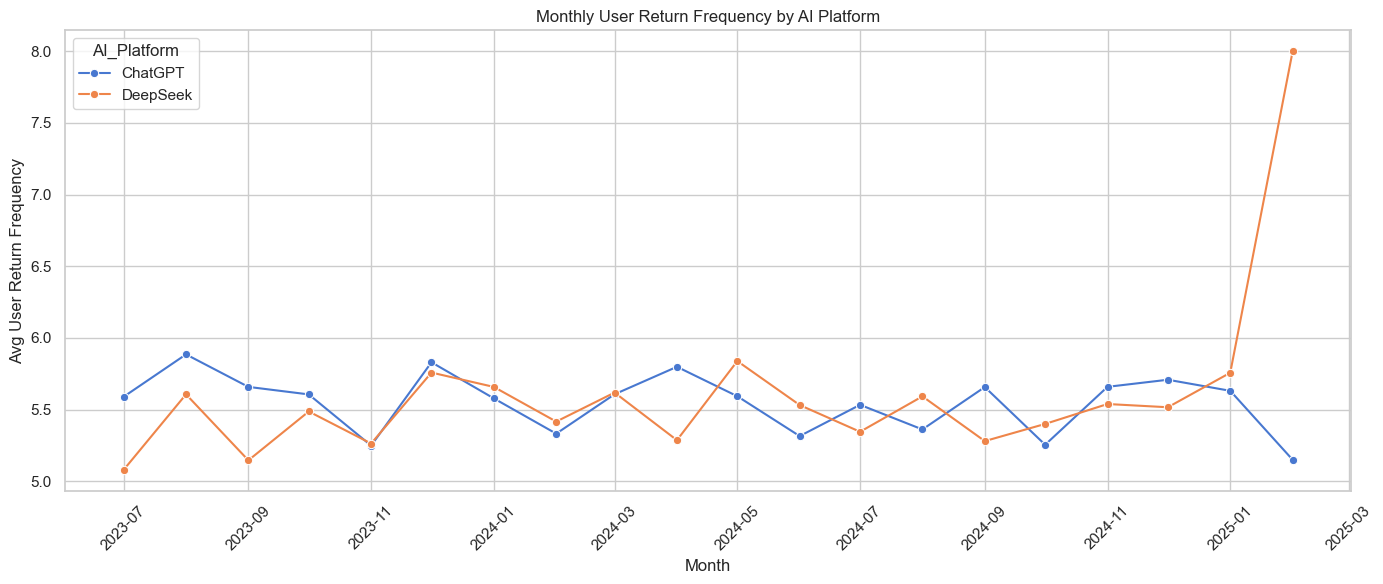

What you'll see:
X-axis: months (e.g., 2024-12, 2025-01, etc.).
Y-axis: average return frequency.
Separate lines for ChatGPT, DeepSeek, etc.


In [36]:
# Extract Year-Month for grouping
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Group by Month and AI Platform, calculate average return frequency
monthly_return = df.groupby(['Month', 'AI_Platform'])['User_Return_Frequency'].mean().reset_index()

# Sort the month column to ensure correct order in plot
monthly_return['Month'] = pd.to_datetime(monthly_return['Month'])
monthly_return = monthly_return.sort_values('Month')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_return, x='Month', y='User_Return_Frequency', hue='AI_Platform', marker='o')
plt.title('Monthly User Return Frequency by AI Platform')
plt.xlabel('Month')
plt.ylabel('Avg User Return Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print("What you'll see:\nX-axis: months (e.g., 2024-12, 2025-01, etc.).\nY-axis: average return frequency.\nSeparate lines for ChatGPT, DeepSeek, etc.")

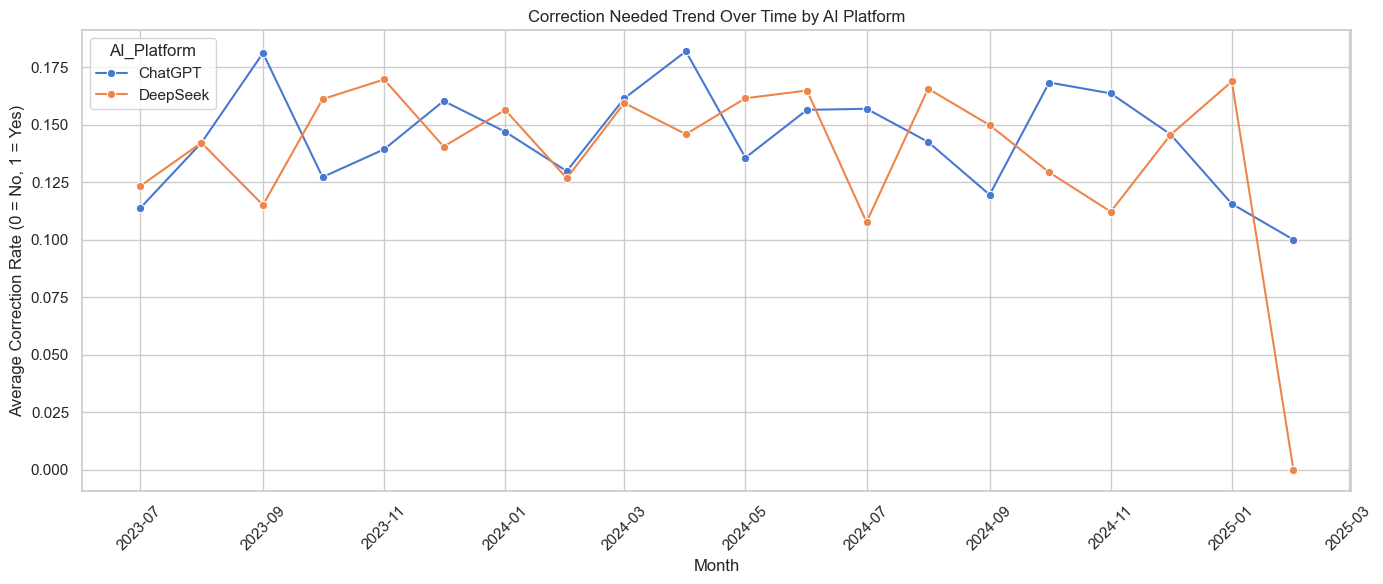

What This Graph Shows: 
X-axis: Months.
Y-axis: Average correction rate (e.g., 0.25 means 25% of interactions needed correction).
Hue: Separate lines for each AI platform.


In [37]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year-Month
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Group by Month and Platform, calculate average correction rate
correction_trend = df.groupby(['Month', 'AI_Platform'])['Correction_Needed'].mean().reset_index()

# Convert Month to datetime for proper sorting
correction_trend['Month'] = pd.to_datetime(correction_trend['Month'])
correction_trend = correction_trend.sort_values('Month')

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=correction_trend, x='Month', y='Correction_Needed', hue='AI_Platform', marker='o')
plt.title('Correction Needed Trend Over Time by AI Platform')
plt.xlabel('Month')
plt.ylabel('Average Correction Rate (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print("What This Graph Shows: \nX-axis: Months.\nY-axis: Average correction rate (e.g., 0.25 means 25% of interactions needed correction).\nHue: Separate lines for each AI platform.")

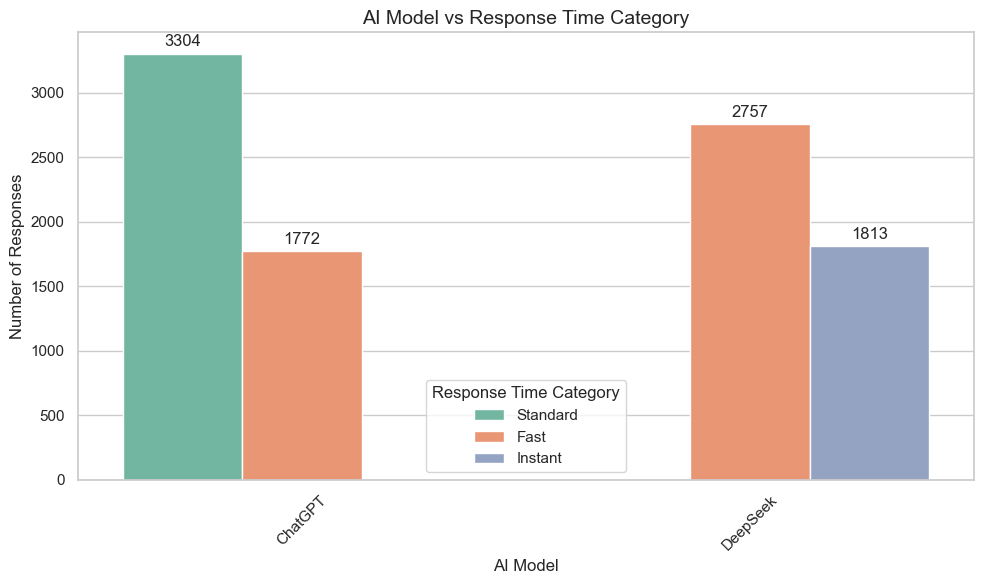

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='AI_Platform', hue='Response_Time_Category', palette='Set2')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('AI Model vs Response Time Category', fontsize=14)
plt.xlabel('AI Model', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.legend(title='Response Time Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


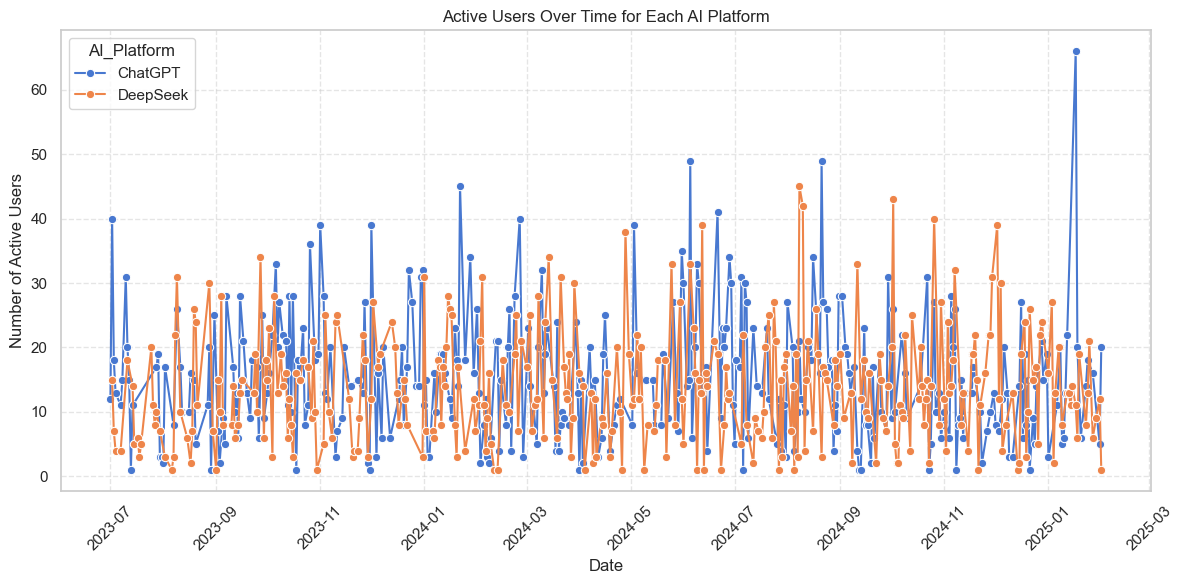

In [39]:
df = pd.read_csv("cleaned_imputed.csv")
# Convert to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract date only (no time)
df['Date_only'] = df['Date'].dt.date

# Group by date and AI platform, count unique users
active_users = df.groupby(['Date_only', 'AI_Platform'])['User_ID'].nunique().reset_index()
active_users.rename(columns={'User_ID': 'Active_Users'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=active_users, x='Date_only', y='Active_Users', hue='AI_Platform', marker='o')

plt.title('Active Users Over Time for Each AI Platform')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


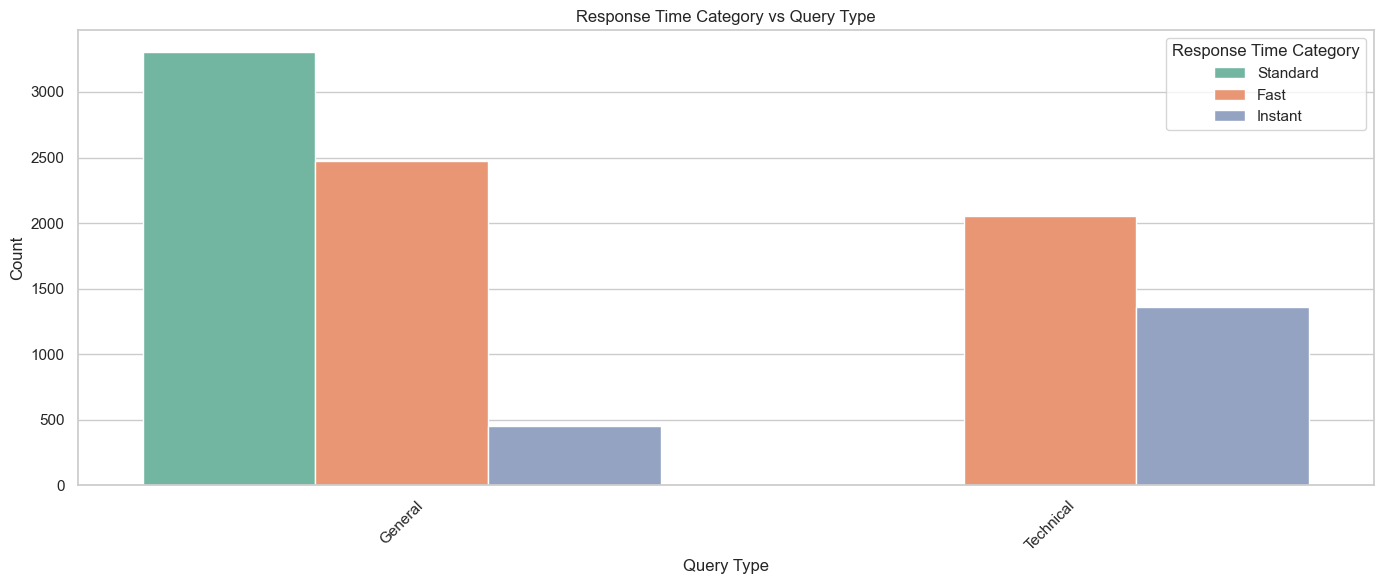

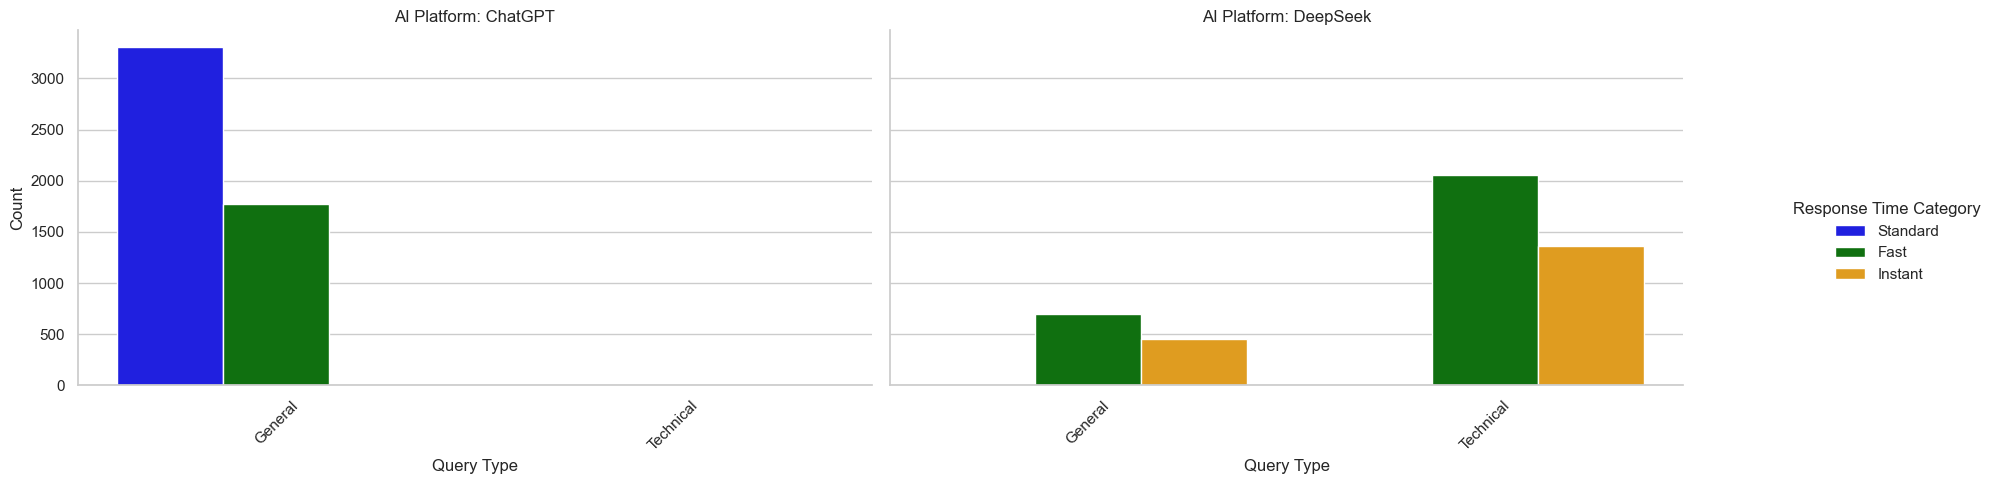

In [40]:

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Query_Type', hue='Response_Time_Category', palette='Set2', dodge=True)
plt.title('Response Time Category vs Query Type')
plt.xlabel('Query Type')
plt.ylabel('Count')
plt.legend(title='Response Time Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Corrected custom palette with capitalized keys
custom_palette = {
    'Standard': 'blue',
    'Fast': 'green',
    'Instant': 'orange'
}

# Plot: Response Time Category vs Query Type for each AI Platform
g = sns.catplot(
    data=df,
    x='Query_Type',
    hue='Response_Time_Category',
    col='AI_Platform',
    kind='count',
    palette=custom_palette,
    height=5,
    aspect=1.3
)

# Adjust titles and labels
g.set_titles("AI Platform: {col_name}")
g.set_axis_labels("Query Type", "Count")
g.set_xticklabels(rotation=45)

# Position the legend outside the plot
g._legend.remove()
g.add_legend(title='Response Time Category', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

plt.tight_layout()
plt.show()


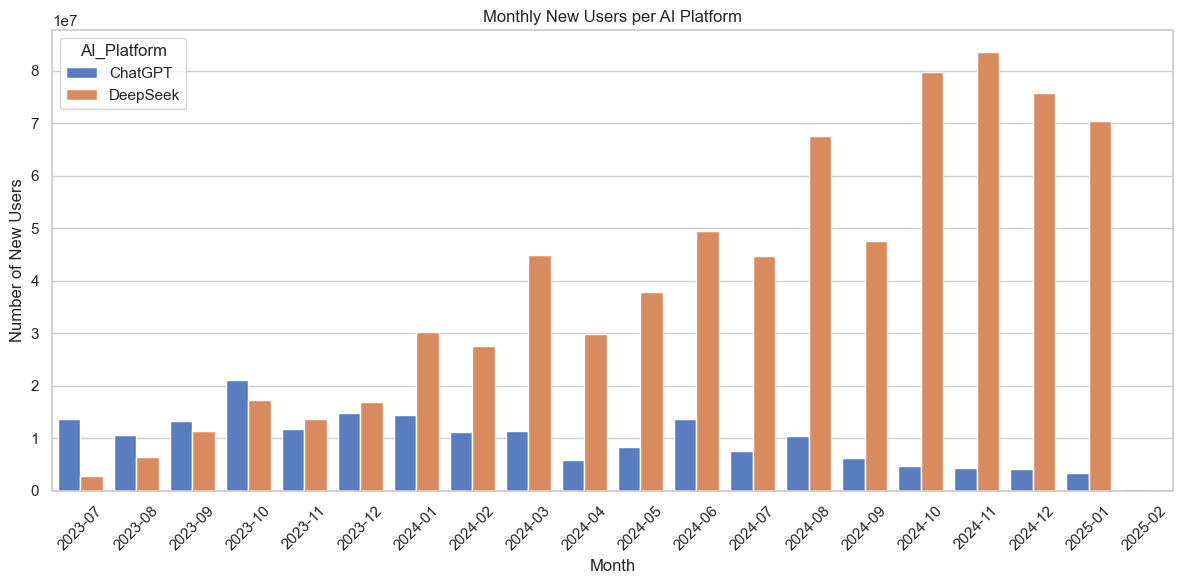

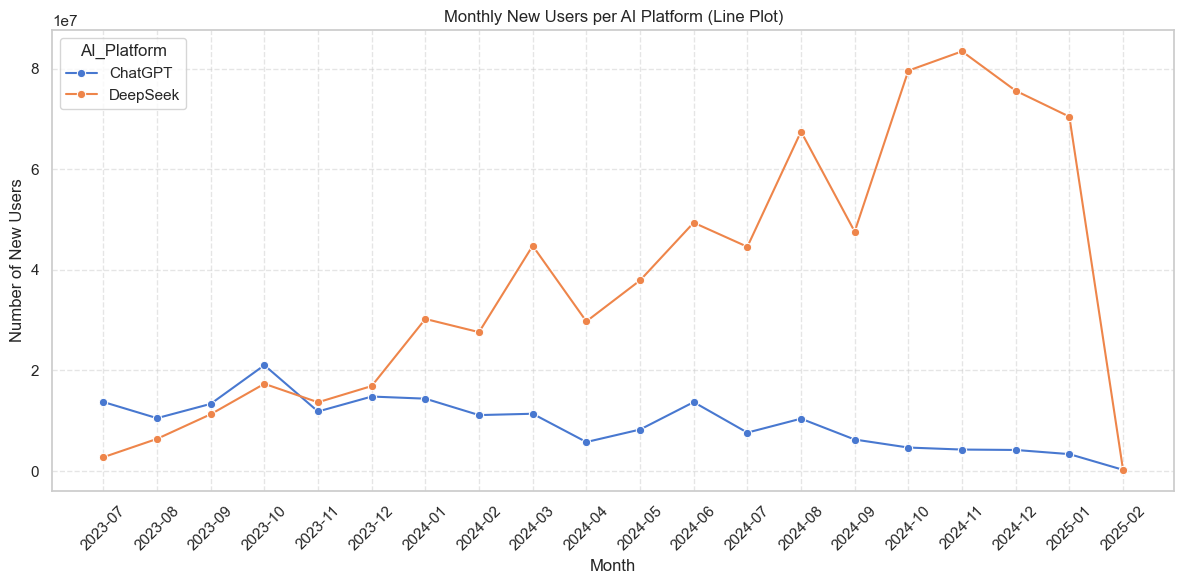

In [41]:

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year-Month
df['Year_Month'] = df['Date'].dt.to_period('M')

# Group by month and AI platform and sum new users
monthly_new_users = df.groupby(['Year_Month', 'AI_Platform'])['New_Users'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_new_users, x='Year_Month', y='New_Users', hue='AI_Platform')
plt.title('Monthly New Users per AI Platform')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year-Month
df['Year_Month'] = df['Date'].dt.to_period('M')

# Group by month and AI platform and sum new users
monthly_new_users = df.groupby(['Year_Month', 'AI_Platform'])['New_Users'].sum().reset_index()

# Convert Year_Month to string for plotting
monthly_new_users['Year_Month'] = monthly_new_users['Year_Month'].astype(str)

# Plot as line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_new_users, x='Year_Month', y='New_Users', hue='AI_Platform', marker='o')
plt.title('Monthly New Users per AI Platform (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



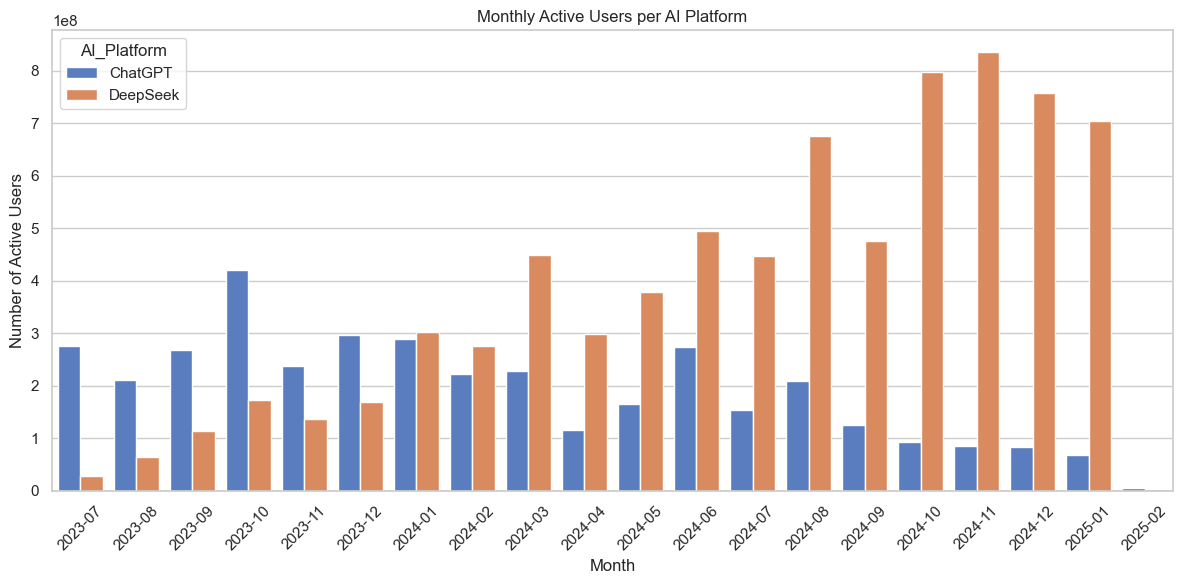

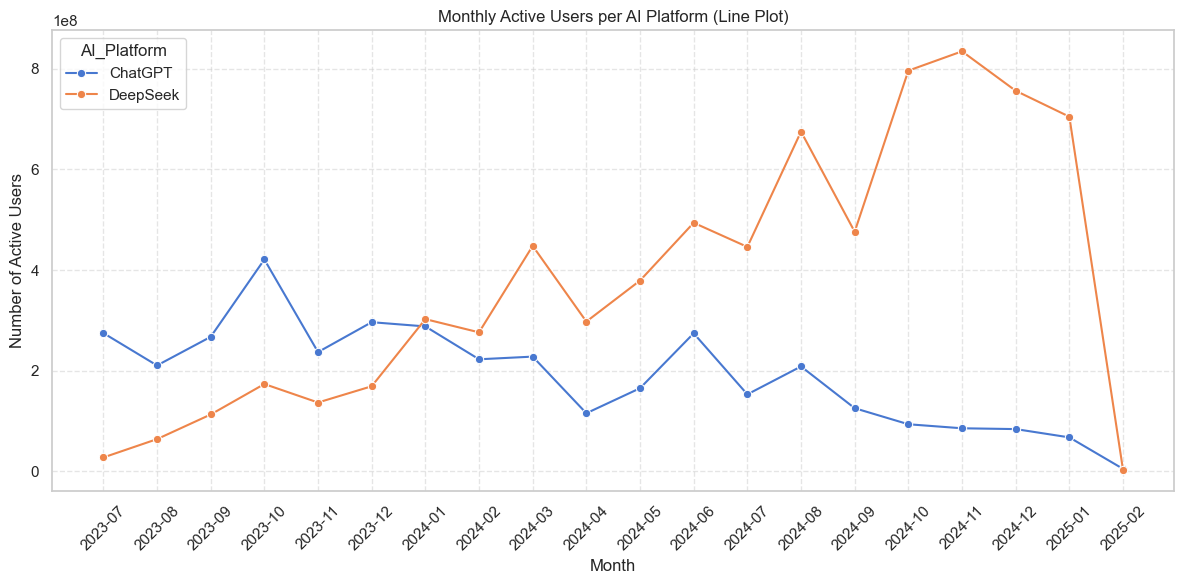

In [42]:
# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year-Month
df['Year_Month'] = df['Date'].dt.to_period('M')

# Group by month and platform, summing active users
monthly_active = df.groupby(['Year_Month', 'AI_Platform'])['Active_Users'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_active, x='Year_Month', y='Active_Users', hue='AI_Platform')
plt.title('Monthly Active Users per AI Platform')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year-Month
df['Year_Month'] = df['Date'].dt.to_period('M')

# Group by month and platform, summing active users
monthly_active = df.groupby(['Year_Month', 'AI_Platform'])['Active_Users'].sum().reset_index()

# Convert Year_Month to string for plotting
monthly_active['Year_Month'] = monthly_active['Year_Month'].astype(str)

# Plot as line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_active, x='Year_Month', y='Active_Users', hue='AI_Platform', marker='o')
plt.title('Monthly Active Users per AI Platform (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [43]:
df = pd.read_csv("14.csv")

In [44]:
# Columns with missing values
missing = []
for col in df.columns:
    if(df[col].hasnans):
        missing += [col]
missing
# Only one column with missing value

['Response_Accuracy']

# Simple Moving Average (SMA), Exponential Smoothing (ETS), and Autoregressive Integrated Moving Average (ARIMA) forecasting 

ARIMA Accuracy Measures:
RMSE: 0.0519
RMSE (%): 6.3361
MAE: 0.0425
MAPE (%): 5.0535

ETS Accuracy Measures:
RMSE: 0.0510
RMSE (%): 6.2249
MAE: 0.0420
MAPE (%): 5.0030

SMA Accuracy Measures:
RMSE: 0.0473
RMSE (%): 5.7650
MAE: 0.0390
MAPE (%): 4.6772


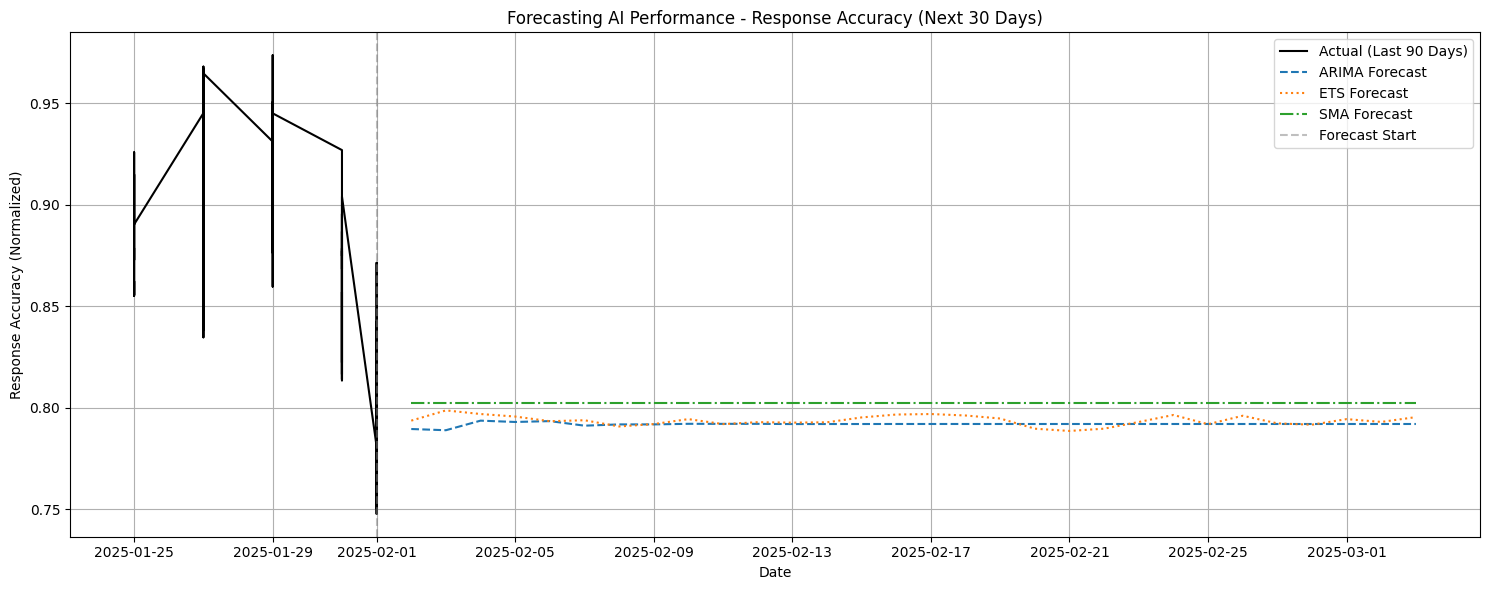

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# --- Load Data ---
df = pd.read_csv("14.csv", parse_dates=['Date'])
df.drop_duplicates(inplace=True)
df.dropna(subset=['Date', 'Response_Accuracy'], inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# --- Interpolate Missing Values ---
df['Response_Accuracy'] = df['Response_Accuracy'].interpolate()

# --- Forecast Horizon ---
forecast_days = 30
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')

# --- SMA Forecast ---
sma_window = 7
df['SMA_Accuracy'] = df['Response_Accuracy'].rolling(window=sma_window).mean()
last_sma = df['SMA_Accuracy'].dropna().iloc[-1]
forecast_sma = pd.Series([last_sma] * forecast_days, index=future_dates)

# --- ARIMA Forecast ---
model_arima = ARIMA(df['Response_Accuracy'], order=(5,1,0)).fit()
forecast_arima = model_arima.forecast(forecast_days)
forecast_arima.index = future_dates

# --- ETS Forecast ---
model_ets = ExponentialSmoothing(df['Response_Accuracy'], trend='add', seasonal='add', seasonal_periods=30).fit()
forecast_ets = model_ets.forecast(forecast_days)
forecast_ets.index = future_dates

# --- Create Dummy 'Actual' for Accuracy Measures (last 30 days as proxy) ---
actual = df['Response_Accuracy'].iloc[-forecast_days:]

# --- Define Function to Calculate Accuracy Measures Using Numpy Arrays ---
def calc_accuracy(true_vals, predicted_vals):
    # Ensure lengths match
    predicted_vals = predicted_vals.iloc[:len(true_vals)]
    
    # Convert series to numpy arrays for calculation (avoids index alignment issues)
    true_arr = true_vals.values
    pred_arr = predicted_vals.values
    
    rmse = np.sqrt(mean_squared_error(true_arr, pred_arr))
    mae = mean_absolute_error(true_arr, pred_arr)
    
    # Calculate MAPE only for non-zero actual values
    non_zero = true_arr != 0
    mape = np.mean(np.abs((true_arr[non_zero] - pred_arr[non_zero]) / true_arr[non_zero])) * 100
    
    rmse_percent = (rmse / np.mean(true_arr)) * 100
    return {'RMSE': rmse, 'RMSE (%)': rmse_percent, 'MAE': mae, 'MAPE (%)': mape}

# --- Calculate Accuracy Measures for Each Model ---
accuracy_arima = calc_accuracy(actual, forecast_arima)
accuracy_ets   = calc_accuracy(actual, forecast_ets)
accuracy_sma   = calc_accuracy(actual, forecast_sma)

# --- Print Accuracy Measures ---
print("ARIMA Accuracy Measures:")
for key, value in accuracy_arima.items():
    print(f"{key}: {value:.4f}")

print("\nETS Accuracy Measures:")
for key, value in accuracy_ets.items():
    print(f"{key}: {value:.4f}")

print("\nSMA Accuracy Measures:")
for key, value in accuracy_sma.items():
    print(f"{key}: {value:.4f}")

# --- Plot Forecasts ---
plt.figure(figsize=(15, 6))
plt.plot(df.index[-90:], df['Response_Accuracy'][-90:], label='Actual (Last 90 Days)', color='black')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', linestyle='--')
plt.plot(forecast_ets.index, forecast_ets, label='ETS Forecast', linestyle=':')
plt.plot(forecast_sma.index, forecast_sma, label='SMA Forecast', linestyle='-.')

plt.axvline(df.index[-1], color='gray', linestyle='--', alpha=0.5, label='Forecast Start')
plt.title('Forecasting AI Performance - Response Accuracy (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Response Accuracy (Normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("forecast_plot.png", dpi=300)
plt.show()


# Anomalies in AI-generated responses and processing speeds.

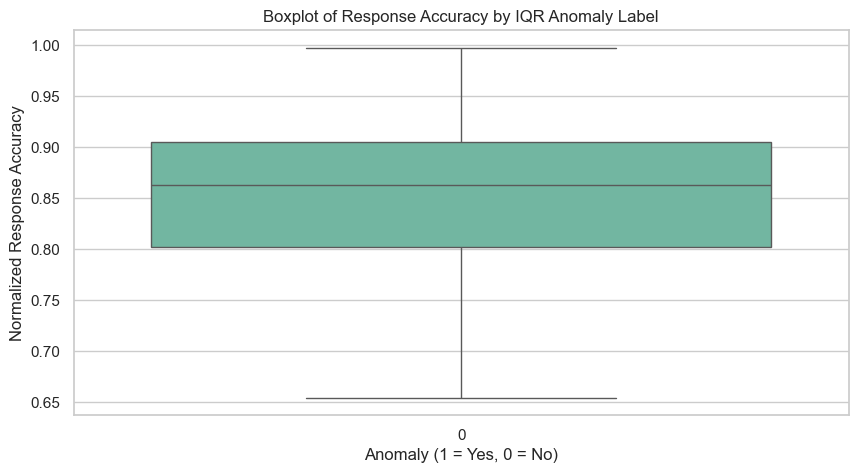

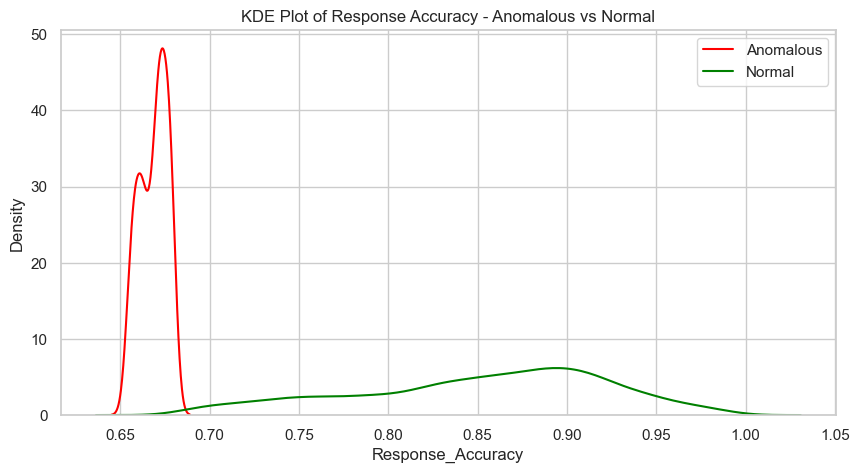

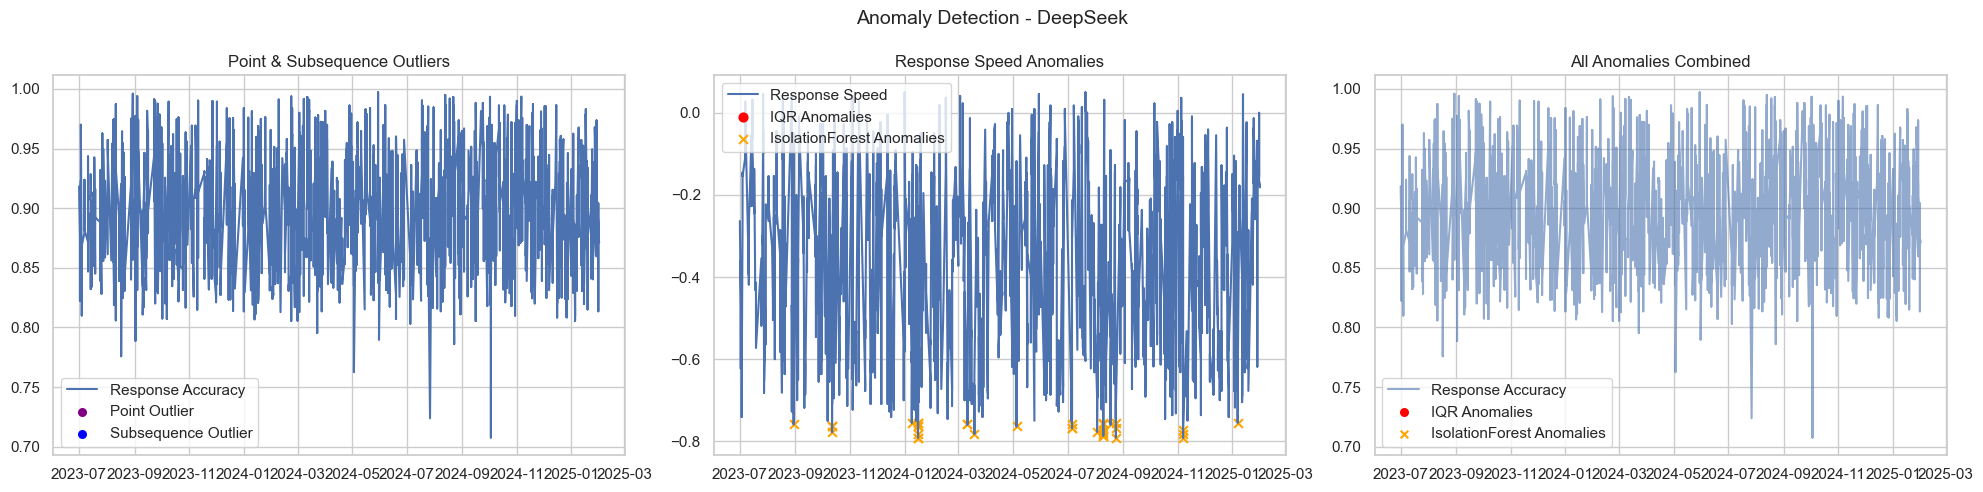

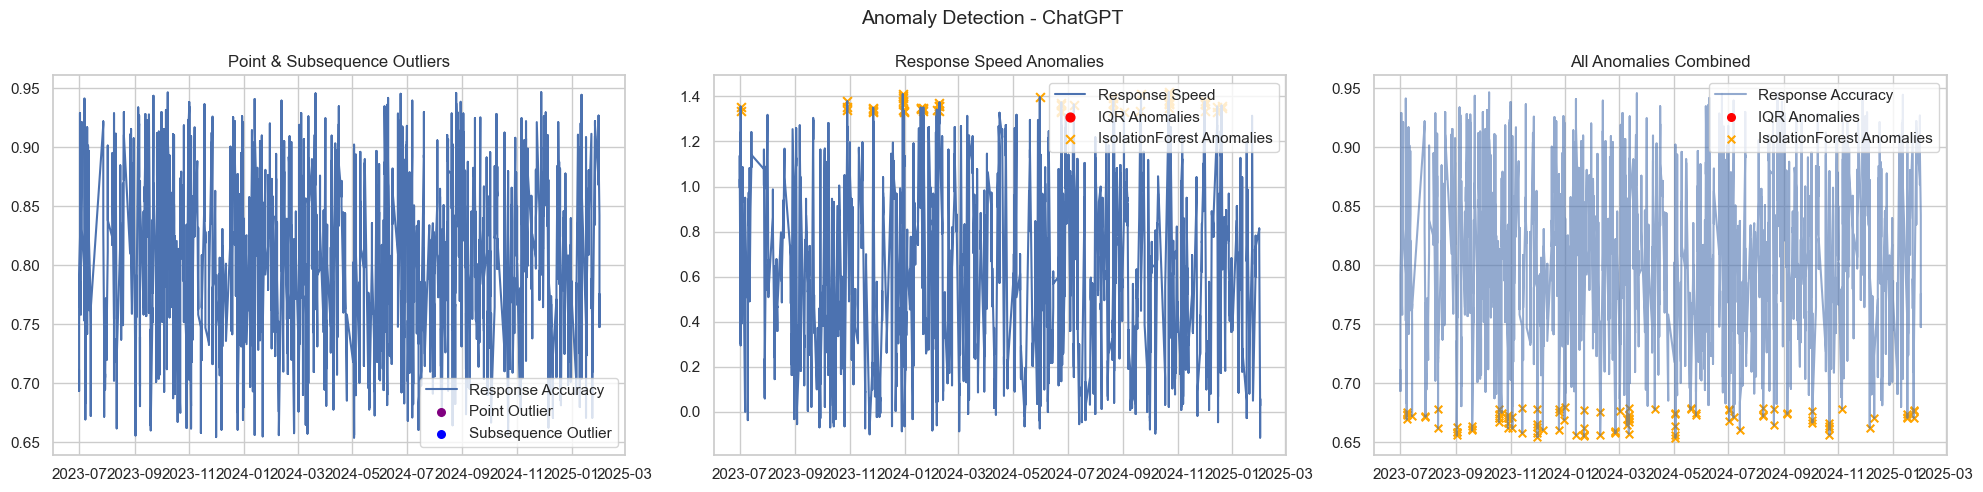

In [46]:
# AI Performance & User Behavior - Enhanced Analysis Pipeline (Outlier Types Included)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

# --- Load and Prepare Data ---
df = pd.read_csv("14.csv", parse_dates=['Date'])
df.drop_duplicates(inplace=True)
df.dropna(subset=['Date', 'AI_Model_Version'], inplace=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# --- Impute Missing Numeric Values ---
numeric_cols = ['Response_Speed_sec', 'Session_Duration_sec', 'User_Experience_Score']
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# --- Normalize with Robust Scaler ---
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Optional: Map Experience Scores if non-numeric (skip if already normalized)
if df['User_Experience_Score'].max() > 1:
    experience_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
    df['User_Experience_Score'] = df['User_Experience_Score'].map(experience_map)

# --- Anomaly Detection: IsolationForest + IQR ---
iso_model = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly_ISO_Response'] = iso_model.fit_predict(df[['Response_Accuracy']])
df['Anomaly_ISO_Speed'] = iso_model.fit_predict(df[['Response_Speed_sec']])

def detect_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)).astype(int)

df['Anomaly_IQR_Response'] = detect_iqr(df['Response_Accuracy'])
df['Anomaly_IQR_Speed'] = detect_iqr(df['Response_Speed_sec'])

# --- Point Outlier Detection using Z-score ---
z_scores = zscore(df['Response_Accuracy'])
df['Point_Outlier'] = ((np.abs(z_scores) > 3)).astype(int)

# --- Subsequence Outlier Detection (Simple rolling std deviation threshold) ---
df['Rolling_Mean'] = df['Response_Accuracy'].rolling(window=5).mean()
df['Rolling_Std'] = df['Response_Accuracy'].rolling(window=5).std()
df['Subsequence_Outlier'] = ((np.abs(df['Response_Accuracy'] - df['Rolling_Mean']) > 2 * df['Rolling_Std'])).astype(int)

# --- Time-Series Forecasting: ARIMA + ETS ---
df['Response_Accuracy'] = df['Response_Accuracy'].interpolate()

model_arima = ARIMA(df['Response_Accuracy'], order=(5,1,0)).fit()
forecast_arima = model_arima.forecast(30)

model_ets = ExponentialSmoothing(df['Response_Accuracy'], trend='add', seasonal='add', seasonal_periods=30).fit()
forecast_ets = model_ets.forecast(30)

# # --- RMSE Evaluation ---
# actual = df['Response_Accuracy'].iloc[-30:]
# rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima[:30]))
# rmse_ets = np.sqrt(mean_squared_error(actual, forecast_ets[:30]))

# # --- RMSE Percentage ---
# rmse_percent_arima = (rmse_arima / actual.mean()) * 100
# rmse_percent_ets = (rmse_ets / actual.mean()) * 100

# print(f"ARIMA RMSE: {rmse_arima:.4f} ({rmse_percent_arima:.2f}%)")
# print(f"ETS RMSE: {rmse_ets:.4f} ({rmse_percent_ets:.2f}%)")

# # --- Visualization: Forecast ---
# plt.figure(figsize=(14,6))
# plt.plot(df.index, df['Response_Accuracy'], label='Actual', alpha=0.6)
# plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast_arima, label='ARIMA Forecast', linestyle='--')
# plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast_ets, label='ETS Forecast', linestyle=':')
# plt.legend()
# plt.title('Forecasting Response Accuracy - ARIMA vs ETS')
# plt.tight_layout()
# plt.show()

# --- Additional Anomaly Visualization ---
sns.set(style="whitegrid")

# Boxplot for Response Accuracy grouped by Anomaly
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Anomaly_IQR_Response'], y=df['Response_Accuracy'], palette='Set2')
plt.title("Boxplot of Response Accuracy by IQR Anomaly Label")
plt.xlabel("Anomaly (1 = Yes, 0 = No)")
plt.ylabel("Normalized Response Accuracy")
plt.show()

# KDE Plot to understand anomaly distribution
plt.figure(figsize=(10,5))
sns.kdeplot(df[df['Anomaly_ISO_Response'] == -1]['Response_Accuracy'], label='Anomalous', color='red')
sns.kdeplot(df[df['Anomaly_ISO_Response'] == 1]['Response_Accuracy'], label='Normal', color='green')
plt.title("KDE Plot of Response Accuracy - Anomalous vs Normal")
plt.legend()
plt.show()

# --- Anomaly Visualization by Platform ---
platforms = df['AI_Platform'].unique()
for platform in platforms:
    subset = df[df['AI_Platform'] == platform]

    fig, axs = plt.subplots(1, 3, figsize=(20,5))
    fig.suptitle(f"Anomaly Detection - {platform}", fontsize=14)

    # Response Accuracy
    axs[0].plot(subset.index, subset['Response_Accuracy'], label='Response Accuracy')
    axs[0].scatter(subset[subset['Point_Outlier'] == 1].index,
                   subset[subset['Point_Outlier'] == 1]['Response_Accuracy'],
                   color='purple', label='Point Outlier', s=30)
    axs[0].scatter(subset[subset['Subsequence_Outlier'] == 1].index,
                   subset[subset['Subsequence_Outlier'] == 1]['Response_Accuracy'],
                   color='blue', label='Subsequence Outlier', s=30)
    axs[0].set_title('Point & Subsequence Outliers')
    axs[0].legend()

    # Response Speed
    axs[1].plot(subset.index, subset['Response_Speed_sec'], label='Response Speed')
    axs[1].scatter(subset[subset['Anomaly_IQR_Speed'] == 1].index,
                   subset[subset['Anomaly_IQR_Speed'] == 1]['Response_Speed_sec'],
                   color='red', label='IQR Anomalies', s=40)
    axs[1].scatter(subset[subset['Anomaly_ISO_Speed'] == -1].index,
                   subset[subset['Anomaly_ISO_Speed'] == -1]['Response_Speed_sec'],
                   color='orange', label='IsolationForest Anomalies', s=40, marker='x')
    axs[1].set_title('Response Speed Anomalies')
    axs[1].legend()

    # Combined Anomaly Overlay
    axs[2].plot(subset.index, subset['Response_Accuracy'], label='Response Accuracy', alpha=0.6)
    axs[2].scatter(subset[subset['Anomaly_IQR_Response'] == 1].index,
                   subset[subset['Anomaly_IQR_Response'] == 1]['Response_Accuracy'],
                   color='red', label='IQR Anomalies', s=30)
    axs[2].scatter(subset[subset['Anomaly_ISO_Response'] == -1].index,
                   subset[subset['Anomaly_ISO_Response'] == -1]['Response_Accuracy'],
                   color='orange', label='IsolationForest Anomalies', s=30, marker='x')
    axs[2].set_title('All Anomalies Combined')
    axs[2].legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

